<p align="center"><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true"></p><h1><font color='0B5345'> <center>

 </center></font></h1>
<h2><font color='0B5345'> <center>
Bioseñales y Sistemas</center></font></h2>
<font  face="Courier New" size="3">

 </center></font></h1>
<h2><font color='0B5345'> <center>
Proyecto 3: Filtros </center></font></h2>
<font  face="Courier New" size="2">

 </center></font></h1>
<h2><font color='0B5345'> <center>
Isabella Vásquez García </center></font></h2>
<font  face="Courier New" size="1">

 </center></font></h1>
<h2><font color='0B5345'> <center>
C.C. 1000.438.341 </center></font></h2>
<font  face="Courier New" size="1">

 </center></font></h1>
<h2><font color='0B5345'> <center>
Marie Anne Johanna Bernal Diaz </center></font></h2>
<font  face="Courier New" size="1">

 </center></font></h1>
<h2><font color='0B5345'> <center>
C.C. 1003.894.043 </center></font></h2>
<font  face="Courier New" size="1">

<p3><center><b><font color='0B5345' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia - Bioingeniería</font></b> </center></p3>

In [53]:
pip install PyWavelets

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.signal as signal
from scipy import fft
import scipy.io as sio;
import seaborn as sns
from scipy.signal import detrend
from scipy import stats
import scipy.signal as signal
from scipy.signal import welch, firwin, filtfilt

## **1. Artículo: Métodos de reducción del ruido**

Para ingresar a las consultas realizadas para este proyecto **(puntos 1 y 3)**, ingresar al siguiente link: [Consultas proyecto 3](https://docs.google.com/document/d/1DOMdwWZpQKIze2FXV-LgkyIiMKl_BvGemMNG00OV8FQ/edit?usp=sharinghttps://)


## **2. Extracción de los archivos**

Inicialmente, se carga el archivo Diagnostics.xlsx con el fin de identificar los archivos pertenecientes a los pacientes con  bradicardia sinusal (**SB** Sinus Bradycardia) y fibrilación auricular (**AFIB** Atrial Fibrillation).

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
archivo_excel = 'Diagnostics.xlsx"'
df = pd.read_excel("/content/drive/MyDrive/Bioseñales/Diagnostics.xlsx")
df

,FileName,Rhythm,Beat,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,MUSE_20180113_171327_27000,AFIB,RBBB TWC,85,MALE,117,234,114,356,496,81,-27,19,208,265,386
1,MUSE_20180112_073319_29000,SB,TWC,59,FEMALE,52,52,92,432,401,76,42,8,215,261,431
2,MUSE_20180111_165520_97000,SA,NONE,20,FEMALE,67,67,82,382,403,88,20,11,224,265,415
3,MUSE_20180113_121940_44000,SB,NONE,66,MALE,53,53,96,456,427,34,3,9,219,267,447
4,MUSE_20180112_122850_57000,AF,STDD STTC,73,FEMALE,162,162,114,252,413,68,-40,26,228,285,354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10641,MUSE_20181222_204306_99000,SVT,NONE,80,FEMALE,196,73,168,284,513,258,244,32,177,261,319
10642,MUSE_20181222_204309_22000,SVT,NONE,81,FEMALE,162,81,162,294,482,110,-75,27,173,254,320
10643,MUSE_20181222_204310_31000,SVT,NONE,39,MALE,152,92,152,340,540,250,38,25,208,284,378
10644,MUSE_20181222_204312_58000,SVT,NONE,76,MALE,175,178,128,310,529,98,-83,29,205,269,360


Dado que se conocen los nombres de los archivos que representan las arritmias SB y AFIB, se obtiene una lista con los nombres
de cada archivo para cada arritmia y se imprime su longitud, con el fin de conocer cuántos archivos deberá tener la lista final

In [57]:
df_SB = df[df["Rhythm"]=="SB"]
df_SB_file_names = df_SB["FileName"]
lista_SB_file_name = df_SB_file_names.tolist()
print(f"Cantidad de archivos para SB (bradicardia sinusal): {len(lista_SB_file_name)}")

df_AFIB = df[df["Rhythm"]=="AFIB"]
df_AFIB_file_names = df_AFIB["FileName"]
lista_AFIB_file_name = df_AFIB_file_names.tolist()
print(f"Cantidad de archivos para AFIB (fibrilación auricula): {len(lista_AFIB_file_name)}")

Cantidad de archivos para SB (bradicardia sinusal): 3889
Cantidad de archivos para AFIB (fibrilación auricula): 1780


Ahora, se recorre la carpeta de archivos en la carpeta ECGDataDenoised (ya descomprimida) que coincidan en nombre con los nombres de los archivos en cada una de las listas mencionadas anteriormente. Posteriormente, se verifica que la lista de archivos tenga el mismo número de elementos que la lista con los nombres

In [58]:
carpeta_data = os.listdir('/content/drive/MyDrive/Bioseñales/ECGData')
lista_SB = []
for archivo in carpeta_data:
    for nombre in lista_SB_file_name:
        if archivo in f"{nombre}.csv":
            lista_SB.append(archivo)
print(len(lista_SB))

3889


In [59]:
lista_AFIB = []
for archivo in carpeta_data:
    for nombre in lista_AFIB_file_name:
        if archivo in f"{nombre}.csv":
            lista_AFIB.append(archivo)

print(len(lista_AFIB))

1780


La función obtener_II_derivación, extrae la segunda derivación de cada archivo. Adicionalmente elimina la primera fila del archivo, dado que la información incluida es igual a la del índice. Así mismo, se evidenció que los datos se extraían de tipo Object, por lo que **se debió hacer una tranformación para que todos los datos fueran numéricos**.

In [60]:
def obtener_II_derivacion(ruta_carpeta, nombre_archivo, columnas):
    ruta = os.path.join(ruta_carpeta, nombre_archivo)
    try:
        data_frame = pd.read_csv(ruta, delimiter=',', names=columnas)
        data_frame = data_frame.drop(data_frame.index[0])
        signal = data_frame["II"]
        signal = pd.to_numeric(data_frame["II"].values, errors='coerce')
    except FileNotFoundError:
        print(f'El archivo {archivo} no se encontró en {ruta_carpeta}.')
    return signal

Se procede a verificar con un solo archivo del grupo SB si la información extraída a través de la función genera valores NaN.

In [61]:
names = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
ruta_carpeta = '/content/drive/MyDrive/Bioseñales/ECGData'
nombre_archivo_SB = 'MUSE_20180116_172000_19000.csv'
ruta_SB = os.path.join(ruta_carpeta, nombre_archivo_SB)
try:
  data_frame = pd.read_csv(ruta_SB, delimiter=',', names=names)
  # eliminando la primera fila del dataframe
  data_un_SB = data_frame.drop(data_frame.index[0])
  # Señal sin la tranformación (genera valores en string)
  signal_un_SB_string = data_un_SB["II"].values
  # Señal con la transformación. El parámetro errors rellena con NaN los valores que no se pudieron transformar
  signal_un_SB = pd.to_numeric(data_un_SB["II"].values, errors='coerce')
except FileNotFoundError:
  print(f'El archivo {archivo} no se encontró en {ruta_carpeta}.')

A continuación se muestra como se obtienen los datos inicialmente, lo que determinó hacer la transformación dada por la línea:

signal_un_SB = pd.to_numeric(data_un_SB["II"].values, errors='coerce')


In [62]:
signal_un_SB_string

array(['24.4', '14.64', '4.88', ..., '34.16', '29.28', '39.04'],
      dtype=object)

Señal luego de la transformación:

In [63]:
signal_un_SB

array([24.4 , 14.64,  4.88, ..., 34.16, 29.28, 39.04])

Verificando que la suma de valores nulos sea cero:

In [64]:
np.isnan(signal_un_SB).sum()

0

Ahora, se pocede a extraer los datos pertenecientes a la segunda derivación de cada archivo (tanto para SB como para AFIB) con la función anterior.

In [65]:
names = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
ruta_carpeta = '/content/drive/MyDrive/Bioseñales/ECGData'
list_SB_II = []
for archivo in lista_SB:
    signal = obtener_II_derivacion(ruta_carpeta, archivo, names)
    data = {"Nombre Archivo": archivo, "II": signal}
    list_SB_II.append(data)

df_SB = pd.DataFrame(list_SB_II)

In [66]:
names = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
ruta_carpeta = '/content/drive/MyDrive/Bioseñales/ECGData'
list_AFIB_II = []

for archivo in lista_AFIB:
    signal = obtener_II_derivacion(ruta_carpeta, archivo, names)
    data = {"Nombre Archivo": archivo, "II": signal}
    list_AFIB_II.append(data)

df_AFIB = pd.DataFrame(list_AFIB_II)

## **3. Tipos de señales Wavelet**
Para conocer las consultas realizadas para este trabajo, ingresar al siguiente link:  [Consultas proyecto 3](https://docs.google.com/document/d/1DOMdwWZpQKIze2FXV-LgkyIiMKl_BvGemMNG00OV8FQ/edit?usp=sharinghttps://)


Respecto a la señal Wavelet elegida (Symlet), a continuación se muestra el código modificado para implementarla

In [67]:
import pywt
from statsmodels.robust import mad

# Ponderación de los umbrales
def wnoisest(coeff):
    stdc = np.zeros((len(coeff),1));
    for i in range(0,len(coeff)):
      # Sigma, con el el que se ponderalizar el umbral
        stdc[i] = (np.median(np.absolute(coeff[i])))/0.6745;
    return stdc;

# Umbral universal
def threshold(coeff):
    Num_samples = 0;
    for i in range(0,len(coeff)):
        Num_samples = Num_samples + coeff[i].shape[0];
    # Ecuación para el umbral universal
    thr = np.sqrt(2*(np.log(Num_samples)))
    return thr

# Umbralizar los detalles
def wthresh(coeff):
    y   = list();
    s = wnoisest(coeff);
    print(s)
    thr = threshold(coeff)
    print(thr)
    for i in range(0,len(coeff)):
        y.append(np.multiply(coeff[i],np.abs(coeff[i])>(thr*s[i])));
    return thr,s,y;

In [68]:
def wavelet(signal, tipo_wavelet):
  # Se lleva la señal filtrada a una sola dimensión
  data = np.squeeze(signal)
  # Familia de wavelet a utilizar
  wavelet = pywt.Wavelet(tipo_wavelet)
  # Número de puntos de la señal para hallar el número de niveles
  num_points = wavelet.dec_len
  # Se halla el número de niveles teniendo en cuenta la longitud de la señal filtrada
  # y la longitud de la señal Wavelet
  levels = int(np.floor((np.log2(data.shape[0]/num_points))-1));
  # El primer elemento de data_wavelet es la aproximación y los siguientes elementos son los detalles de cada nivel
  data_wavelet = pywt.wavedec( data, tipo_wavelet, level=5);
  # Detalles
  details = data_wavelet[1:]
  # Unbralización de los detalles
  thr, s, details_t = wthresh(details);
  coeff = list()
  # Se extrae la aproximación
  coeff.append(data_wavelet[0])
  # Iterando sobre los detalles de cada nivel
  for i in range(len(details_t)):
    # Agrega a la lista los detalles umbralizados
    coeff.append(details_t[i])
  # Reconstrucción de la señal
  x_rec = pywt.waverec(coeff, tipo_wavelet);
  # Se ajusta la longitud de la señal reconstruida a la longitud original de la señal de entrada
  x_rec = x_rec[0:data.shape[0]];
  return x_rec

**Función para hallar el diagrama de bode (extraída de la práctica 6 y del código dado por el profe)**

In [69]:
def diagrama_bode(b,a,order,nyq_rate = 1):
    w,h = signal.freqz(b,a);
    h_dB = 20 * np.log10 (abs(h));

    plt.figure(figsize=(20,3));
    plt.subplot(131);
    plt.plot((w/max(w))*nyq_rate,abs(h));
    plt.ylabel('Magnitude');
    plt.xlabel(r'Normalized Frequency (xrad/sample)');
    plt.title(r'Frequency response. Order: ' + str(order));
    [xmin, xmax, ymin, ymax] = plt.axis();
    plt.grid(True);

    plt.subplot(132);
    plt.plot((w/max(w))*nyq_rate,h_dB);
    plt.ylabel('Magnitude (db)');
    plt.xlabel(r'Normalized Frequency (xrad/sample)');
    plt.title(r'Frequency response. Order: ' + str(order));
    plt.grid(True)
    plt.grid(True)


    plt.subplot(133);
    h_Phase = np.unwrap(np.arctan2(np.imag(h),np.real(h)));
    plt.plot((w/max(w))*nyq_rate,h_Phase);
    plt.ylabel('Phase (radians)');
    plt.xlabel(r'Normalized Frequency (xrad/sample)');
    plt.title(r'Phase response. Order: ' + str(order));
    plt.subplots_adjust(hspace=0.5);
    plt.grid(True)
    plt.show()

## **4. Flujos de procesamiento**

### **Extracción de las 10 señales de cada grupo**

In [70]:
list_10_AFIB = ['MUSE_20180112_124901_96000.csv', 'MUSE_20180712_160301_31000.csv','MUSE_20180115_121348_74000.csv', 'MUSE_20180115_122859_65000.csv','MUSE_20180113_122318_73000.csv',
                'MUSE_20180112_165410_17000.csv', 'MUSE_20180115_131206_56000.csv', 'MUSE_20180116_131235_03000.csv','MUSE_20180114_124752_95000.csv', 'MUSE_20180118_130902_75000.csv']
list_10_SB = ['MUSE_20180113_073758_40000.csv', 'MUSE_20180116_172116_15000.csv', 'MUSE_20180115_125600_87000.csv', 'MUSE_20180115_120319_43000.csv','MUSE_20180118_131204_28000.csv',
              'MUSE_20180114_130503_62000.csv','MUSE_20180113_131043_15000.csv', 'MUSE_20180118_170607_78000.csv', 'MUSE_20180116_170211_18000.csv', 'MUSE_20180119_174016_53000.csv']

In [71]:
AFIB_10_signals = df_AFIB[df_AFIB['Nombre Archivo'].isin(list_10_AFIB)]
SB_10_signals = df_SB[df_SB['Nombre Archivo'].isin(list_10_SB)]

### **Consideraciones sobre los flujos de procesamiento**

A continuación, se justifica la elección de los parámetros de los filtros utilizados en los 3 flujos de trabajo.

### **Filtro pasa-altas usando filtro IIR a 0.5 Hz**

- **Orden del filtro:** el orden del filtro IIR se definió a través de probar con diferentes ordenes (3,6 y 9), dado que, según la bibliografía consultada [1,2] estos órdenes son comumente utilizadas en estudios realizados a señales de ECG. **Sin embargo, al realizar un análisis en diagramas de Bode, se determinó que el orden 3 tenía una mejor atenuación y mayor selecitividad (los diagramas de bode se muestran en la siguiente sección**).

- **Topología del filtro:** según lo encontrado en la literatura, los tipos de filtros más utilizados son el Elíptico y Butterworth para análisis de ECG [3]. Sin embargo, **en un estudio realizado con arritmias se definió al elíptico como un una topología óptima para el análisis a realizar** [1], por lo que se determinó emplear esta topología para el filtro en cuestión.

Cabe resaltar que  los filtros IIR con topología elíptica cuentan con dos parámetros adicionales: **rs y rp**. El primero se refiere al máximo rizado en la banda de paso y el segundo a la menor atenuación en la banda de paso. **Los valores utilizados para estos dos paramétros se escogieron a través de un análisis con diagramas de bode, el cual arrojó los valores de rs=0.0001 y rp= 80 como los mejores**.

###**Filtro Welch**

Para este filtro se utilizaron las funciones definidas en la sección anterior. Cabe resaltar que **la función se creó con 5 niveles**, dado que, al aumentar el número de los mismos (máximo 8 como se indica en la teoría) la señal reconstruida no reconocía los picos propios de la señal de ECG. Así mismo, respecto a la familia Wavelet, como se mencionó en la consullta, se escogió a la familia **Symlet debido a sus diferentes usos en estudios relacionados con ECG [referencias en el documento de consultas]**, sin embargo, respecto al orden, se probó con dos: 5 y 7 pero no se evidenciaron muchas diferencias, así que **se definió utilizar el menor orden (5) para reducir el gasto computacional**.

###**Filtro Pasa bajas a 50 Hz**

- **Tipo de filtro:** Para este filtro se determinó usar **FIR**, dado que cuentan con mayor estabilidad (según lo visto en clase y en la práctica 6 del laboratorio). Además, en términos de la función de transferencia los filtros FIR solo cuenta con numerador, por lo que al no tener denominador los polos son cero y siempre se ubican en el orígen del plano real e imaginario por lo que son más estables.

- **Orden del filtro:** Respecto al orden, el mismo se calculó de la siguiente manera:

m = ΔF / (Δf / Fs)

Con

- ΔF = 5.0 (de acuerdo con la ventana de Kaiser)
- Δf = 50 Hz (ancho de banda del filtro)
- Fs = 500 Hz

Por lo tanto el orden calculado fué de 50. Sin embargo, al hacer un análisis en bode, se determinó que con un orden de **101**, se obtenía la mejor atenuación, por lo que se eligió el mismo.

- **Ventana:** Por otro lado, respecto a la ventana utilizada, la misma se definió la ventana **Kaiser** para implementarse. Esta ventana se utilizó en un estudio comparativo entre diferentes ventanas utilizadas en filtros FIR para señales de ECG y, dentro de las ventana evaluadas se definió a la ventana Kaiser como la mejor debido a su bajo error cuadrático medio [7].

Por otra lado, esta ventana cuenta con un parámetro denominado **beta**, el cual, controla la forma de la ventana y según se encontró en la teoría debe oscilar entre 4 y 9, por lo que se probaron diferentes valores dentro del rango mencionado para encontrar el que mejor selectividad generaba en el filtro, sin embargo, **no se evidenciaron diferencias por los que se decidió utilizar el de menor valor (4)** [4].

## **Análisis en bode para determinar el mejor orden para los dos filtros digitales implementados en los flujos de trabajo**

**Filtros IIR: Comparación entre 3 órdenes (3,6,9) y diferentes valores de rp y rs (para la topología ellip)**

<ipython-input-69-e8d375d97250>:3: RuntimeWarning: divide by zero encountered in log10
  h_dB = 20 * np.log10 (abs(h));


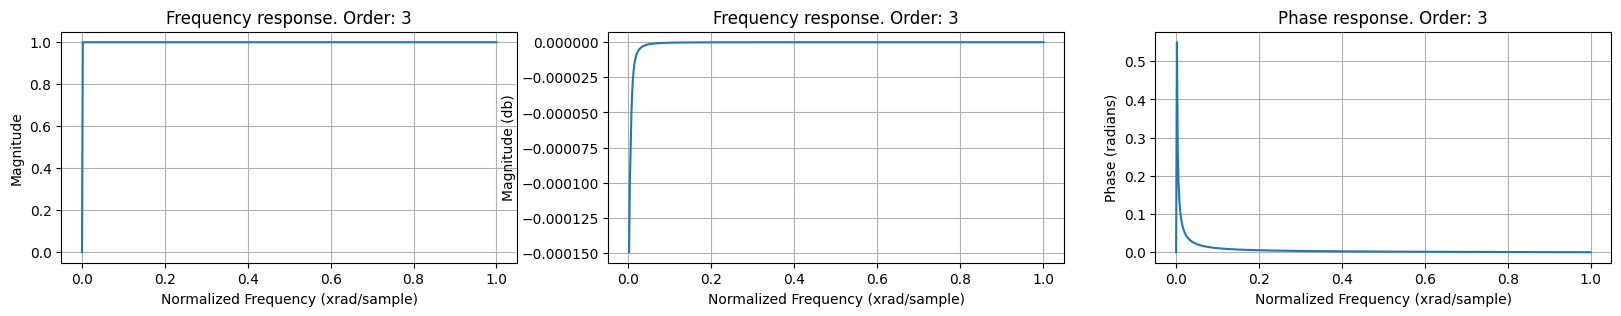

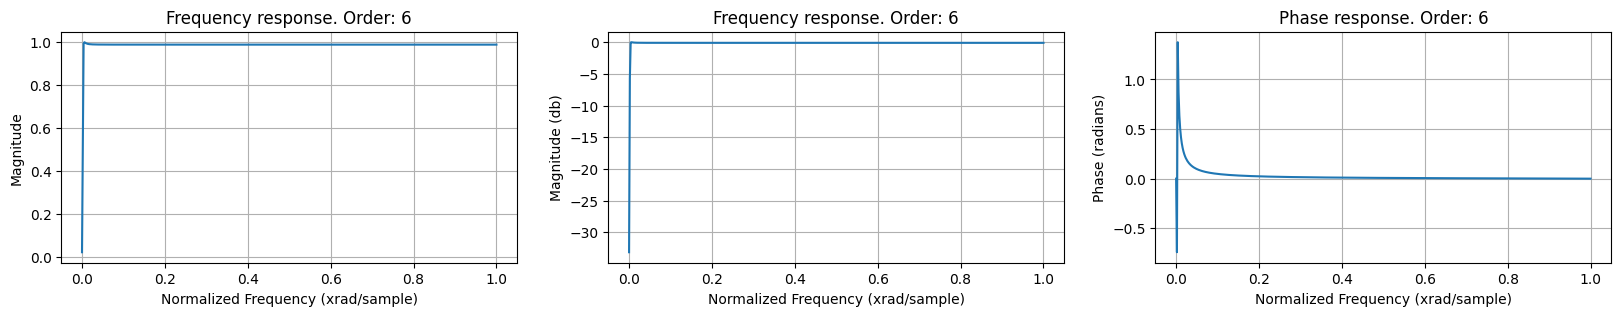

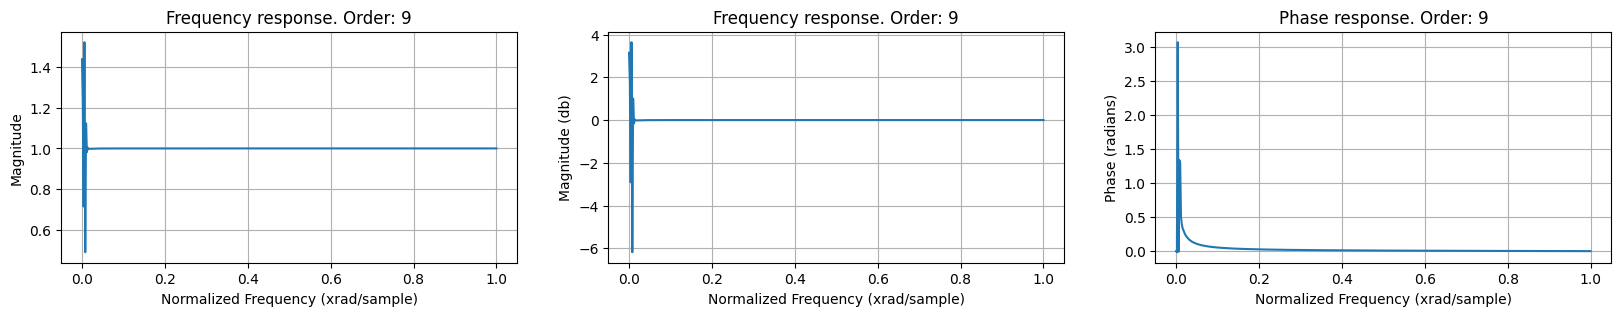

In [72]:
import numpy as np
from scipy import signal

Fs = 500
nyquist = Fs / 2
wc_HP_IIR = 0.5 / nyquist
# Filtro IIR orden 3 rs menor y rp mayor
b_high_1, a_high_1 = signal.iirfilter(3, wc_HP_IIR, rp=0.0001, rs=80, btype='high', analog=False, ftype='ellip')
# Filtro IIR orden 6 rs y rp con valores intermedios
b_high_2, a_high_2 = signal.iirfilter(6, wc_HP_IIR, rp=0.1, rs=30, btype='high', analog=False, ftype='ellip')
# Filtro IIR orden 9 rs mayor y rp menor
b_high_3, a_high_3 = signal.iirfilter(9, wc_HP_IIR, rp=5, rs=10, btype='high', analog=False, ftype='ellip')
diagrama_bode(b_high_1, a_high_1, 3)
diagrama_bode(b_high_2, a_high_2, 6)
diagrama_bode(b_high_3, a_high_3, 9)

Según lo evidenciado anteriormente, a medida que aumenta el orden, la selectividad del filtro IIR disminuye. Respecto a los valores de Rs y Rp, a medida que aumenta el valor de Rs y disminuye el valor de Rp, también disminuye la selectividad del filtro y genera mayores oscilaciones en la banda de paso.

Finalmente, se concluye al filtro IIR de orden 3 y con valores de rs = 0.0001 y rp=80 el de mejor selectividad para aplicarse en las señales de ECG.

**Filtros FIR: Comparación entre 3 órdenes (31, 57,101)**



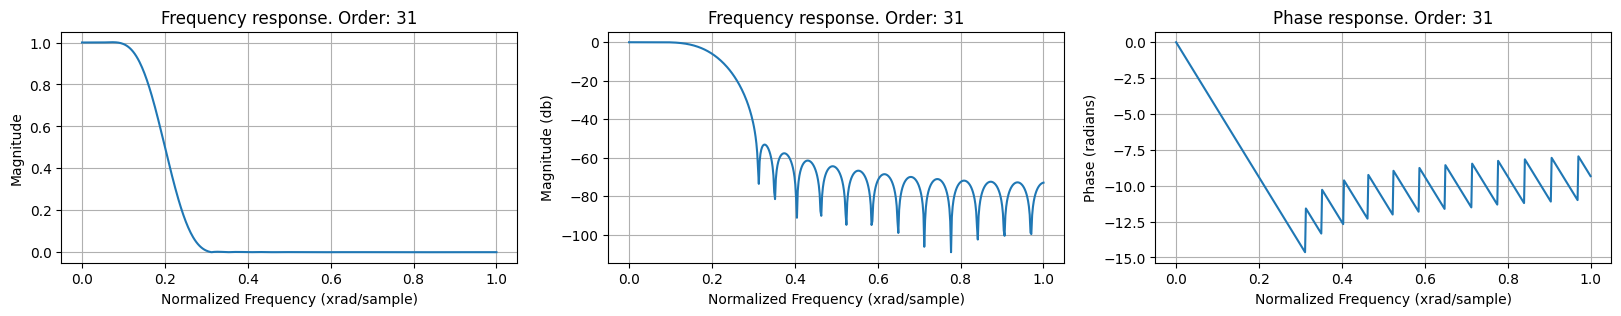

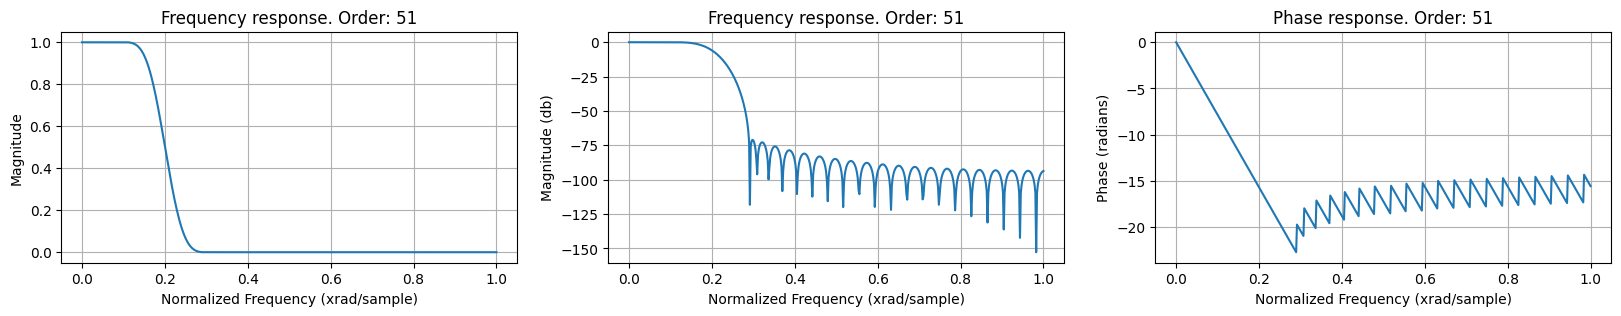

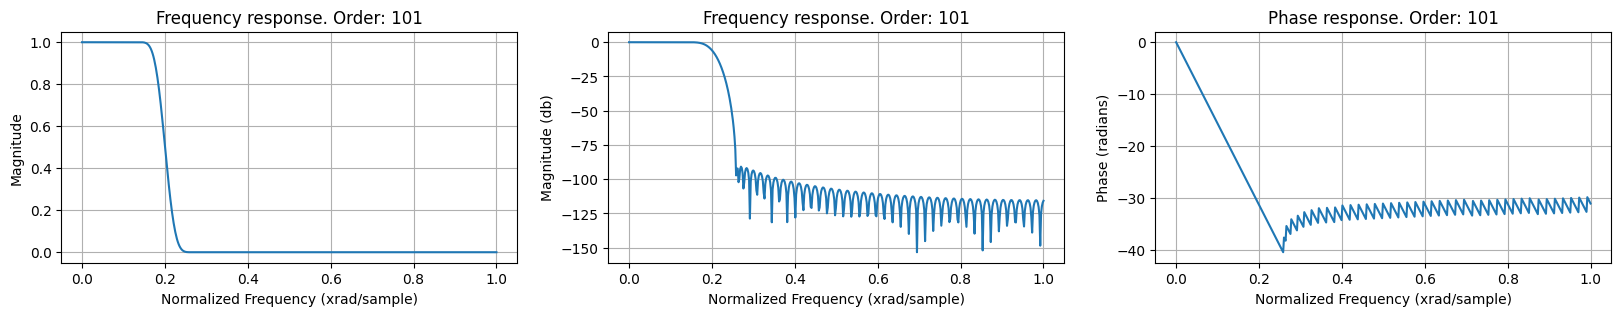

In [73]:
import numpy as np
from scipy import signal

Fs = 500
nyquist = Fs / 2
wc_LP_FIR = 50 / nyquist
# Filtro FIR pasa bajas con un orden de 31
lowpass_1 = signal.firwin(31,wc_LP_FIR, pass_zero = 'lowpass',window=('kaiser',5)) #filtro
# Filtro FIR pasa bajas con un orden de 57
lowpass_2 = signal.firwin(51, wc_LP_FIR, pass_zero = 'lowpass',window=('kaiser',7)) #filtro
# Filtro FIR pasa bajas con un orden de 101
lowpass_3 = signal.firwin(101, wc_LP_FIR, pass_zero = 'lowpass',window=('kaiser',9)) #filtro
diagrama_bode(lowpass_1, 1, 31)
diagrama_bode(lowpass_2, 1, 51)
diagrama_bode(lowpass_3, 1, 101)


Los diagramas de bode mostrados anteriormente, determinan que el filtro FIR de oden 101 confiere una mayor selectividad, debido a que la pendiente de atenuación es más pronunciada respecto a los demás órdenes. Sin embargo, debido al alto orden, es posible que se genere un mayor gasto computacional.

Respecto al valor de beta para la ventana de Kaiser, no se evidenciaron diferencias entre los 3 valores determinados, por lo que se decidió utilizar el de menor valor (5).

Así mismo, como se evidencia en la banda de rechazo, estos filtros cuenta con osicilaciones, las cuales puede reducir la efectividad del filtrado, dado que no hay una atenuación uniforme sino que la misma está dada por diferentes valores que oscilan dentro de un rango. Lo anterior puede determinar un bajo rendimiento del filtrado. Sin embargo, a medida que aumenta el orden las oscilaciones indicadas anteriormente se hacen más uniformes, por lo que es probable el rendimiento del filtro también aumente con el orden.

### **Flujo de procesamiento 1**

In [74]:
def flujo_1(signal_,wc_HP, wc_LP, order_HP, order_LP):
  # Filtro pasa altas IIR 0.5Hz
  order_HP_IIR_F1 = order_HP
  Fs = 500
  nyquist = Fs / 2
  wc_HP_IIR_F1 = wc_HP / nyquist
  rp = 0.0001
  rs =  80
  b_high_IIR_F1, a_high_IIR_F1 = signal.iirfilter(order_HP_IIR_F1, wc_HP_IIR_F1, rp=rp, rs=rs, btype='high', analog=False, ftype='ellip')
  y_high_IIR_F1 = signal.filtfilt(b_high_IIR_F1, a_high_IIR_F1, signal_)
  # Filtro Wavelet
  x_rec_F1 = wavelet(y_high_IIR_F1, 'sym5')
  # Filtro  FIR Pasa bajas 50Hz
  order_LP_FIR_F1 = order_LP
  Fs = 500
  nyquist = Fs / 2
  wc_LP_FIR_F1 = wc_LP / nyquist
  LP_FIR_F1 = signal.firwin(order_LP_FIR_F1,wc_LP_FIR_F1, pass_zero = 'lowpass',window=('kaiser', 4))
  y_low_FIR_F1 = signal.filtfilt(b=LP_FIR_F1,a=1,x=x_rec_F1)
  return y_low_FIR_F1

### **Flujo de procesamiento 2**

In [75]:
def flujo_2(signal_, wc_LP, order_LP):
  # Detrend
  signal_SD_detrend_F2 = signal.detrend(signal_)
  # Filto Wavelet
  x_rec_F2 = wavelet(signal_SD_detrend_F2, 'sym5')
  # Filtro pasa bajas 50 Hz
  order_FIR_F2 = order_LP
  Fs = 500
  nyquist = Fs / 2
  wc_LP_FIR_F2 = wc_LP / nyquist
  LP_FIR_F2 = signal.firwin(order_FIR_F2,wc_LP_FIR_F2, pass_zero = 'lowpass',window=('kaiser',4))
  y_low_FIR_F2 = signal.filtfilt(b=LP_FIR_F2,a=1,x=x_rec_F2)
  return y_low_FIR_F2

### **Flujo de procesamiento 3**

In [76]:
def flujo_3(signal_, wc_HP, wc_LP, order_HP, order_LP):
  # Filtro pasa altas 0.5 Hz IIR
  order_HP_IIR_F3 = order_HP
  Fs = 500
  nyquist = Fs / 2
  wc_HP_IIR_F3 = wc_HP / nyquist
  rp = 0.0001
  rs =  80
  b_high_IIR_F3, a_high_IIR_F3 = signal.iirfilter(order_HP_IIR_F3, wc_HP_IIR_F3, rp=rp, rs=rs, btype='high', analog=False, ftype='ellip')
  y_high_IIR_F3 = signal.filtfilt(b_high_IIR_F3, a_high_IIR_F3, signal_)
  # Filtro pasa bajas 50 Hz FIR
  order_LP_FIR_F3 = order_LP
  Fs = 500
  nyquist = Fs / 2
  wc_LP_FIR_F3 = wc_LP / nyquist
  LP_FIR_F3 = signal.firwin(order_LP_FIR_F3,wc_LP_FIR_F3, pass_zero = 'lowpass',window=('kaiser',4))
  y_low_FIR_F3 = signal.filtfilt(b=LP_FIR_F3,a=1,x=y_high_IIR_F3)
  return y_low_FIR_F3

###**Aplicando los 3 flujos de trabajo a las 10 señales extraídas de cada grupo**

In [77]:
import numpy as np
from scipy import signal

list_signal_10_AFIB_F1 = []
list_signal_10_AFIB_F2 = []
list_signal_10_AFIB_F3 = []
for index, columna_AFIB in AFIB_10_signals.iterrows():
    signal_F1 = flujo_1(columna_AFIB['II'],0.5, 50, 3, 101)
    signal_F2 = flujo_2(columna_AFIB['II'], 50, 33)
    signal_F3 = flujo_3(columna_AFIB['II'],0.5, 50, 3, 101)
    list_signal_10_AFIB_F1.append(signal_F1)
    list_signal_10_AFIB_F2.append(signal_F2)
    list_signal_10_AFIB_F3.append(signal_F3)
AFIB_10_signals['F1'] = list_signal_10_AFIB_F1
AFIB_10_signals['F2'] = list_signal_10_AFIB_F2
AFIB_10_signals['F3'] = list_signal_10_AFIB_F3

[[138.4555848 ]
 [ 59.61709985]
 [133.25891329]
 [ 48.59820638]
 [ 18.42630511]]
4.121184414849974
[[138.45574161]
 [ 59.61711525]
 [133.25891455]
 [ 48.59820699]
 [ 18.42630505]]
4.121184414849974
[[91.2755501 ]
 [33.04885241]
 [13.6296061 ]
 [ 5.9947827 ]
 [ 2.67655373]]
4.121184414849974
[[91.28797642]
 [33.04886088]
 [13.62960699]
 [ 5.99478277]
 [ 2.67655373]]
4.121184414849974
[[107.35800842]
 [ 40.65471653]
 [ 24.88918103]
 [ 10.90877184]
 [  4.11994677]]
4.121184414849974
[[107.35803259]
 [ 40.65471705]
 [ 24.88918183]
 [ 10.90877196]
 [  4.11994675]]
4.121184414849974
[[141.16176889]
 [ 67.40572463]
 [ 55.78272143]
 [ 25.98621807]
 [  9.90146005]]
4.121184414849974
[[141.16189808]
 [ 67.40573213]
 [ 55.78272124]
 [ 25.98621846]
 [  9.90146008]]
4.121184414849974
[[218.13221644]
 [ 43.07991914]
 [ 16.7683273 ]
 [  7.86823483]
 [  3.64700706]]
4.121184414849974
[[218.13228306]
 [ 43.07993496]
 [ 16.76832605]
 [  7.86823491]
 [  3.64700707]]
4.121184414849974
[[75.31542436]
 [38.

<ipython-input-77-8bcfbeb8bde9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AFIB_10_signals['F1'] = list_signal_10_AFIB_F1
<ipython-input-77-8bcfbeb8bde9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AFIB_10_signals['F2'] = list_signal_10_AFIB_F2
<ipython-input-77-8bcfbeb8bde9>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [78]:
import numpy as np
from scipy import signal

list_signal_10_SB_F1 = []
list_signal_10_SB_F2 = []
list_signal_10_SB_F3 = []
for index, columna_SB in SB_10_signals.iterrows():
    signal_F1 = flujo_1(columna_SB['II'],0.5, 50, 3, 101)
    signal_F2 = flujo_2(columna_SB['II'], 50, 33)
    signal_F3 = flujo_3(columna_SB['II'],0.5, 50, 3, 101)
    list_signal_10_SB_F1.append(signal_F1)
    list_signal_10_SB_F2.append(signal_F2)
    list_signal_10_SB_F3.append(signal_F3)
SB_10_signals['F1'] = list_signal_10_SB_F1
SB_10_signals['F2'] = list_signal_10_SB_F2
SB_10_signals['F3'] = list_signal_10_SB_F3

[[69.58512464]
 [41.69476069]
 [38.50915591]
 [22.84424661]
 [10.76196713]]
4.121184414849974
[[69.58514069]
 [41.69476508]
 [38.50915691]
 [22.84424715]
 [10.76196718]]
4.121184414849974
[[30.42354819]
 [21.27617453]
 [18.42377048]
 [14.68650908]
 [ 9.12004907]]
4.121184414849974
[[30.42353882]
 [21.27617929]
 [18.42377088]
 [14.68650916]
 [ 9.1200491 ]]
4.121184414849974
[[54.38729932]
 [17.92094409]
 [30.96835158]
 [13.1205157 ]
 [ 6.10767079]]
4.121184414849974
[[54.392146  ]
 [17.92094737]
 [30.96835227]
 [13.12051576]
 [ 6.10767078]]
4.121184414849974
[[31.61015173]
 [11.02565596]
 [10.99573236]
 [ 4.85643709]
 [ 4.06416704]]
4.121184414849974
[[31.61014608]
 [11.0256575 ]
 [10.99573255]
 [ 4.85643715]
 [ 4.06416704]]
4.121184414849974
[[43.78118784]
 [22.78604716]
 [16.21914761]
 [ 6.65327283]
 [ 3.01945202]]
4.121184414849974
[[43.78119189]
 [22.57842452]
 [16.21914811]
 [ 6.65327289]
 [ 3.01945202]]
4.121184414849974
[[61.88430685]
 [20.25810855]
 [12.73017176]
 [ 6.78752019]


<ipython-input-78-05a5f9ef0e11>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SB_10_signals['F1'] = list_signal_10_SB_F1
<ipython-input-78-05a5f9ef0e11>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SB_10_signals['F2'] = list_signal_10_SB_F2
<ipython-input-78-05a5f9ef0e11>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

### **Decripción de los resultados y flujo de procesamiento escogido**

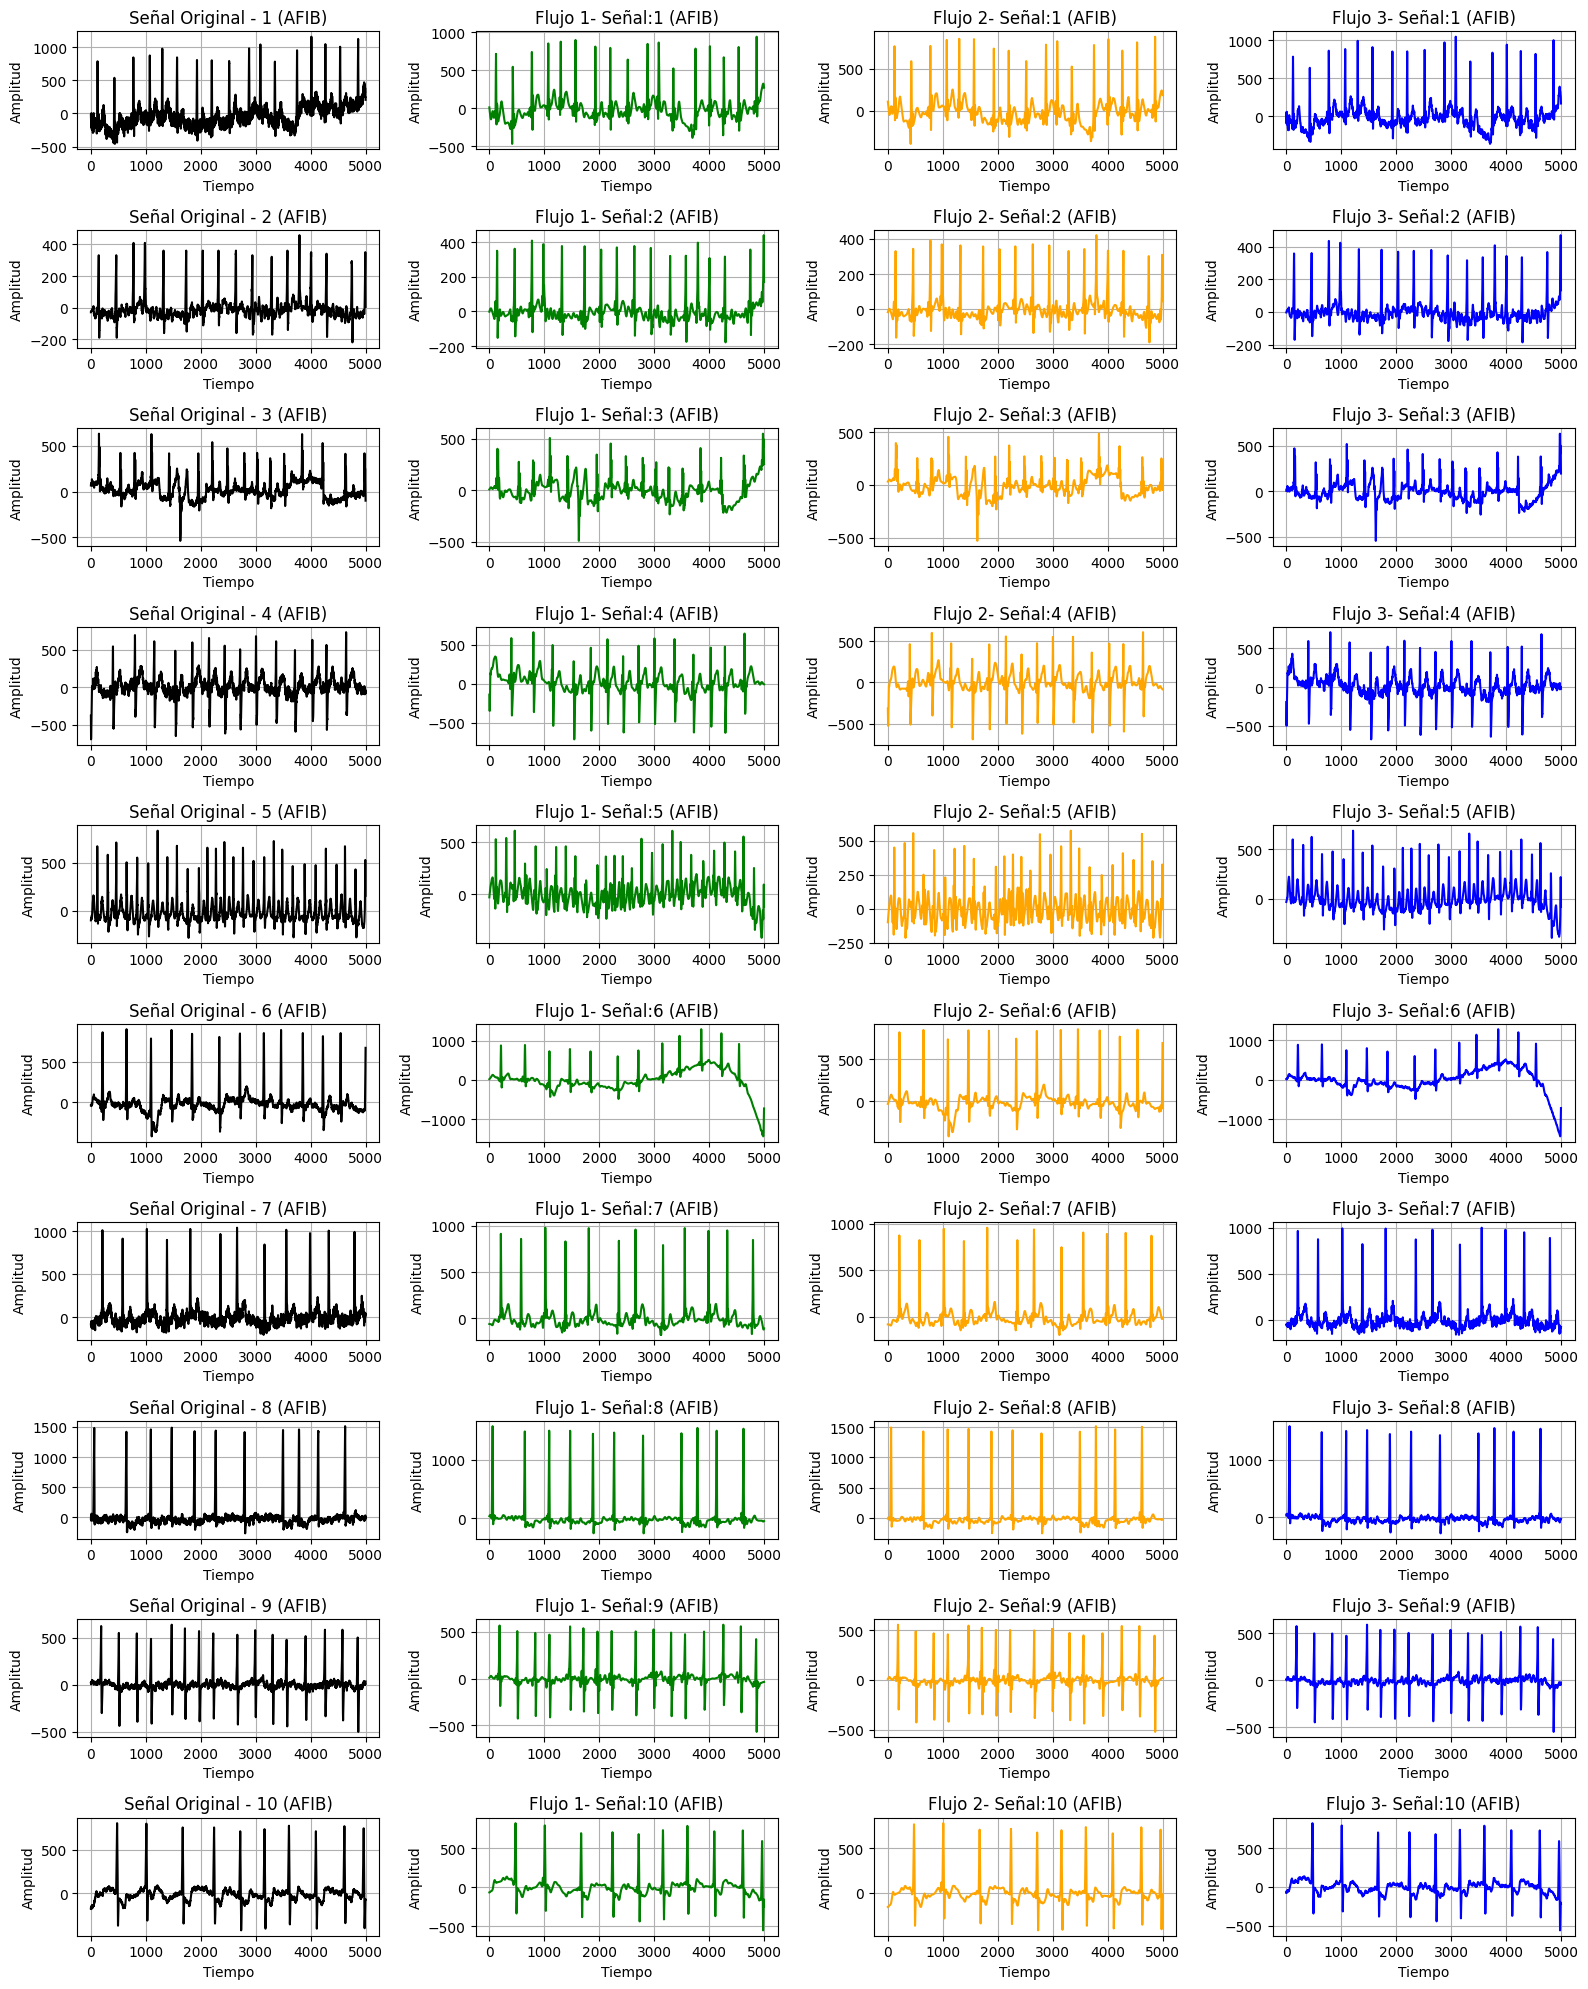

In [79]:
fig, axs = plt.subplots(10, 4, figsize=(16, 20))
for i in range(10):
    signal_II_AFIB = AFIB_10_signals.iloc[i]['II']
    signal_F1_AFIB = AFIB_10_signals.iloc[i]['F1']
    signal_F2_AFIB = AFIB_10_signals.iloc[i]['F2']
    signal_F3_AFIB = AFIB_10_signals.iloc[i]['F3']

    axs[i, 0].plot(signal_II_AFIB, color='black')
    axs[i, 1].plot(signal_F1_AFIB, color='green')
    axs[i, 2].plot(signal_F2_AFIB, color='orange')
    axs[i, 3].plot(signal_F3_AFIB, color='blue')

    axs[i, 0].set_title(f'Señal Original - {i+1} (AFIB)')
    axs[i, 1].set_title(f'Flujo 1- Señal:{i+1} (AFIB)')
    axs[i, 2].set_title(f'Flujo 2- Señal:{i+1} (AFIB)')
    axs[i, 3].set_title(f'Flujo 3- Señal:{i+1} (AFIB)')

    for j in range(4):
        axs[i, j].set_xlabel('Tiempo')
        axs[i, j].set_ylabel('Amplitud')
        axs[i, j].grid(True)

plt.tight_layout()
plt.show()

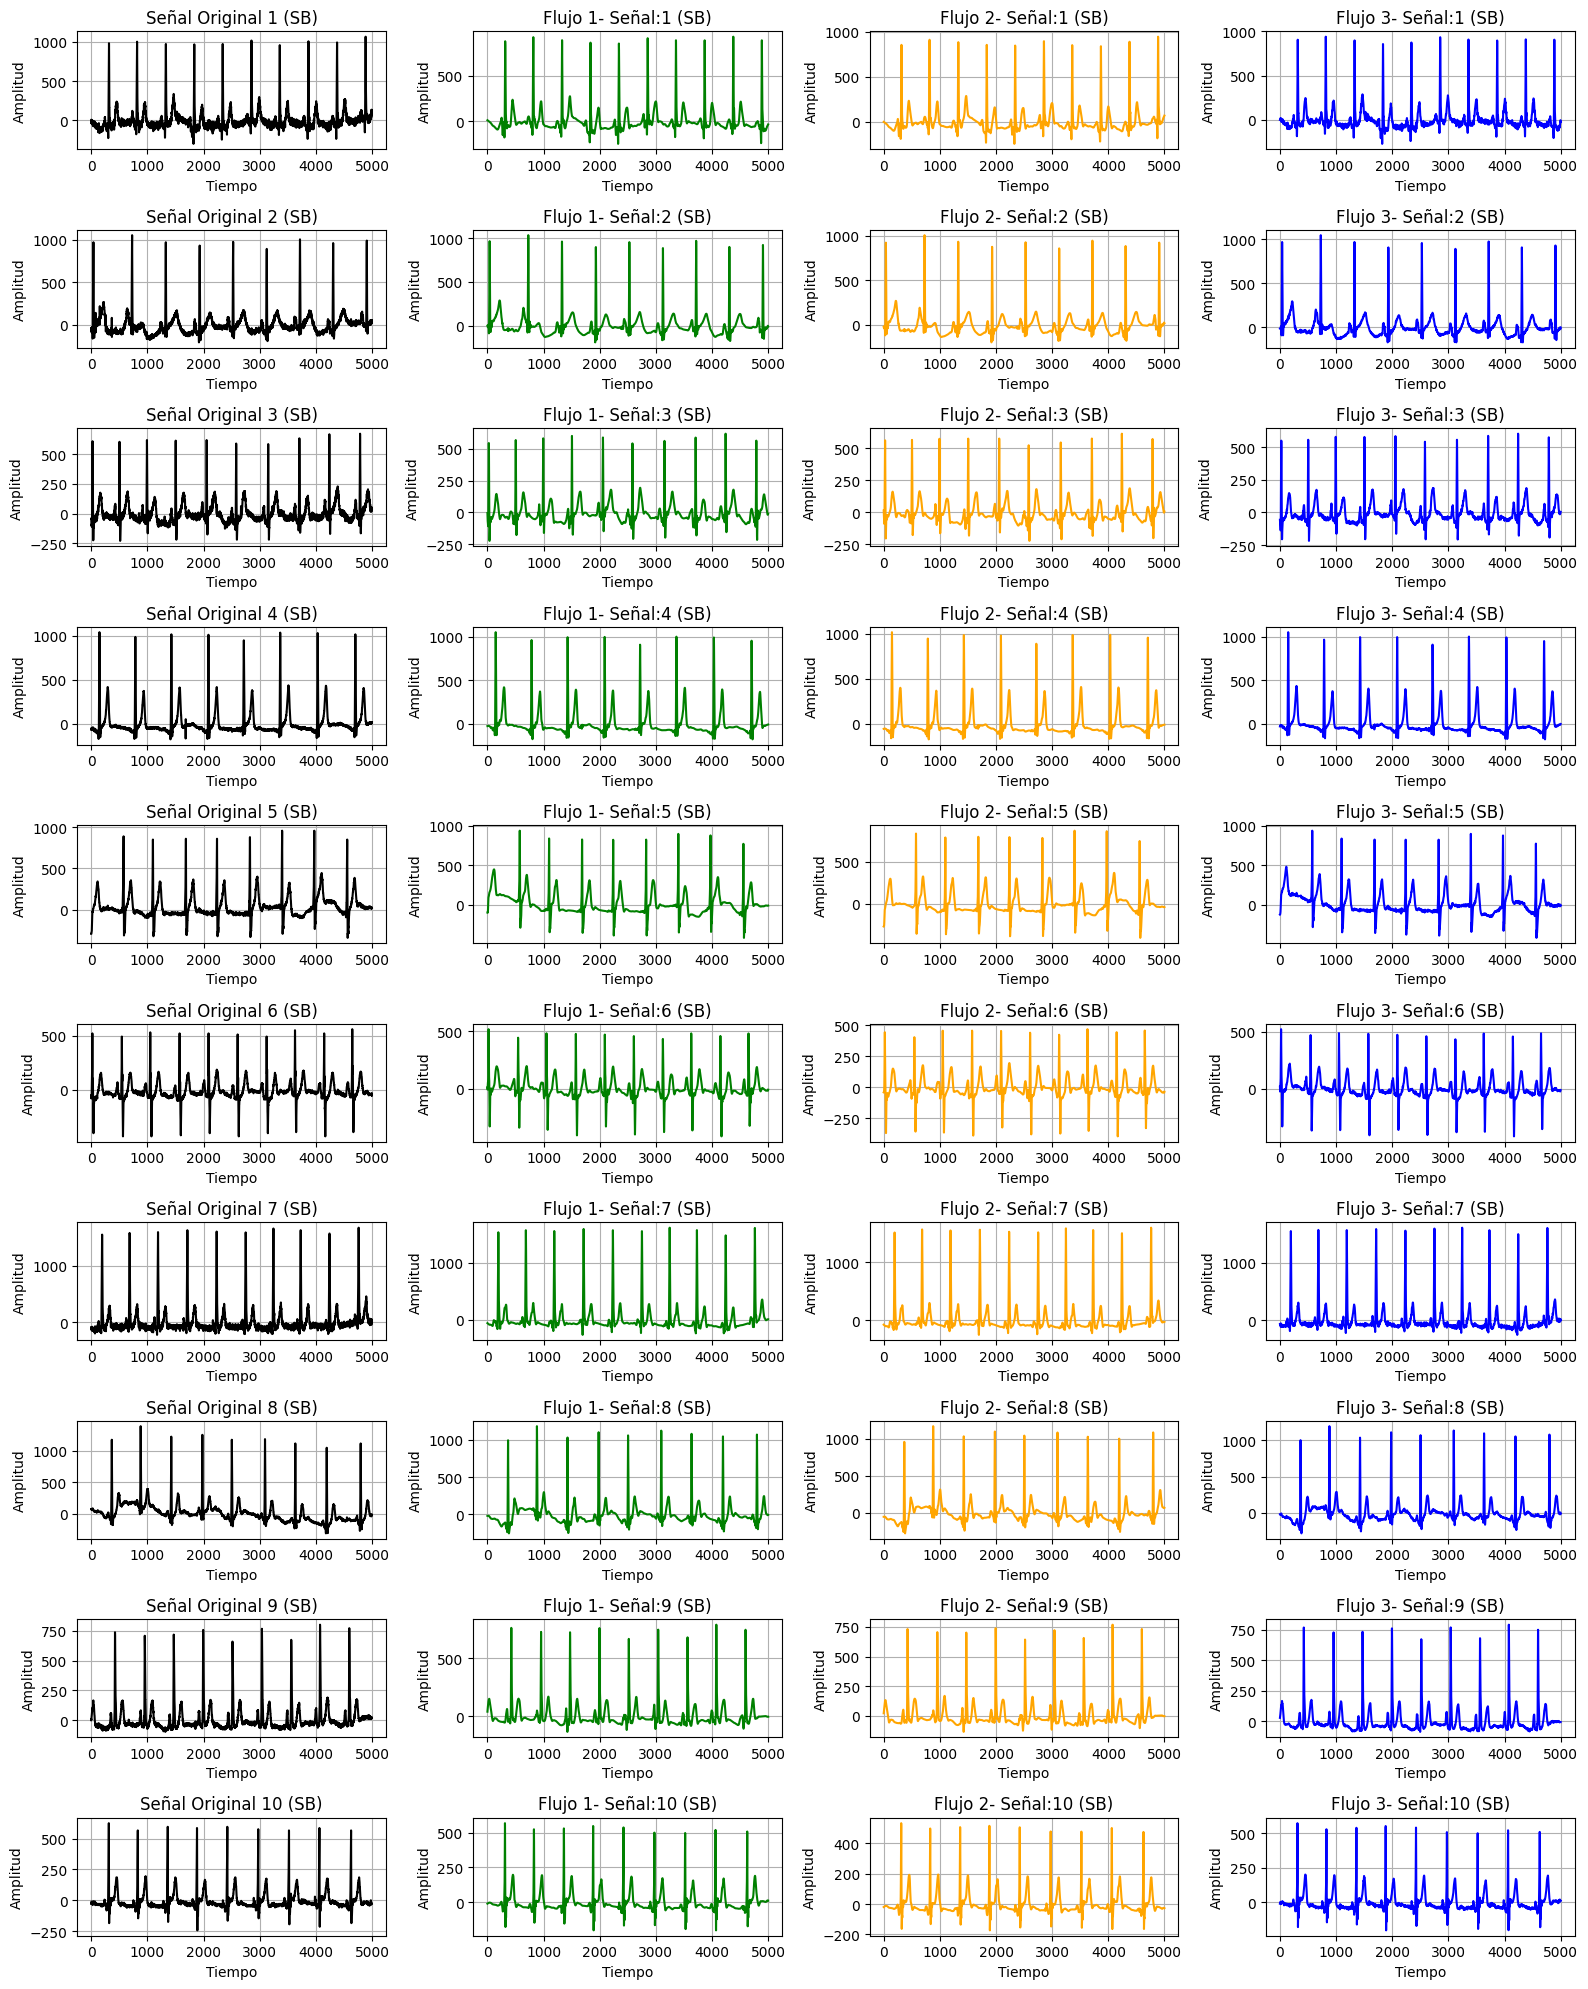

In [80]:
fig, axs = plt.subplots(10, 4, figsize=(16, 20))
for i in range(10):
    signal_II_SB = SB_10_signals.iloc[i]['II']
    signal_F1_SB = SB_10_signals.iloc[i]['F1']
    signal_F2_SB = SB_10_signals.iloc[i]['F2']
    signal_F3_SB = SB_10_signals.iloc[i]['F3']

    axs[i, 0].plot(signal_II_SB, color='black')
    axs[i, 1].plot(signal_F1_SB, color='green')
    axs[i, 2].plot(signal_F2_SB, color='orange')
    axs[i, 3].plot(signal_F3_SB, color='blue')

    axs[i, 0].set_title(f'Señal Original {i+1} (SB)')
    axs[i, 1].set_title(f'Flujo 1- Señal:{i+1} (SB)')
    axs[i, 2].set_title(f'Flujo 2- Señal:{i+1} (SB)')
    axs[i, 3].set_title(f'Flujo 3- Señal:{i+1} (SB)')

    for j in range(4):
        axs[i, j].set_xlabel('Tiempo')
        axs[i, j].set_ylabel('Amplitud')
        axs[i, j].grid(True)

plt.tight_layout()
plt.show()

Lo anterior representan las gráfias de las 10 señales para cada grupo mostradas antes y después de cada flujo de procesamiento.

Para el grupo con AFIB, se evidenció que los flujos de procesamiento 1 y 3 generaban tendencias que deformaron la señal después del filtrado (Señal 5 grupo con AFIB). En contraste, el flujo 2 permitió obtener una señal más parecida a la señal original con una reducción de ruido considerable y sin la integración de ciertas tendencias a las señales evidenciadas en los flujos 1 y 3.

Para el grupo con SB, donde las señales tienen menos picos en el mismo tiempo debido a las características propias de la patología, se evidenció un fenómeno parecido al anterior. Así mismo, aplicar el flujo de procesamiento 2 generó una señal con menor ruido pero conservando las características propias de la señal original en términos de oscilaciones.

Según lo anterior, **el flujo de procesamiento 2 se definió como el más adecuado para aplicarse en las demás señales**. Esto se debe posiblemente a la utilización de un detrending que provoca una eliminación de tendencias. Cabe destacar que los flujos de procesamiento 1 y 3 cuenta con un filtro IIR de tipo pasa altas, que, como se vió en la teoría estos filtros tienden a ser más inestables, por lo que es probable que el flujo de procesamiento 2 tuviera un mayor rendimiento (medido de forma gráfica) debido a que no contaba con el filtro IIR. Finalmente, para el flujo de procesamiento 3 se evidencia aún mucho ruido en la señal, por lo que definitivamente se evidencia la necesidad de utilizar un filtro wavelet para eliminar señales de baja amplitud de señales de alta amplitud


### **Comparación con las señales de Proyecto 2**

### **Normalización de las señales filtradas**

Para esta sección, se reutilizó la función de compresión del pryecto 2 y se le aplicó a cada señal de cada grupo un detrend, compresión y un detrend por segunda vez.

In [81]:
def compression(serie):
    xmin = serie.min()
    xmax = serie.max()
    num = serie-xmin
    den = xmax - xmin
    compr = num/den
    return compr

In [82]:
list_Filter_AFIB = []
for index, columna_AFIB in df_AFIB.iterrows():
    # Se aplica el flujo de procesamiento 2 a cada señal del grupo con AFIB
    signal_Filter = flujo_2(columna_AFIB['II'], 50, 101)
    # Se le aplica un primer detrend
    signal_Filter_D1 = signal.detrend(signal_Filter)
    # Se comprime la señal
    signal_Filter_D1_C = compression(signal_Filter_D1)
    # Se aplica un segundo detrend
    signal_Filter_D1_C_D2 = signal.detrend(signal_Filter_D1_C)
    list_Filter_AFIB.append(signal_Filter_D1_C_D2)
df_AFIB['Filter'] = list_Filter_AFIB

Se truncaron las últimas líneas 5000 del resultado de transmisión.
 [  4.89939903]]
4.121184414849974
[[101.4537212 ]
 [ 31.68453875]
 [ 20.22295303]
 [ 12.82353755]
 [  6.84050422]]
4.121184414849974
[[102.5815347 ]
 [ 43.38052067]
 [ 42.88686381]
 [ 28.01440009]
 [ 12.79303513]]
4.121184414849974
[[56.38426538]
 [33.41422715]
 [21.59632101]
 [ 9.90712457]
 [ 3.94953316]]
4.121184414849974
[[73.67989422]
 [42.67344582]
 [36.8183903 ]
 [28.86753656]
 [16.59276441]]
4.121184414849974
[[85.28867144]
 [33.98411974]
 [19.65662492]
 [ 8.39921991]
 [ 3.5036481 ]]
4.121184414849974
[[109.18536293]
 [ 45.05900679]
 [ 34.58895213]
 [ 14.9193349 ]
 [  5.65534724]]
4.121184414849974
[[64.85225114]
 [45.50346788]
 [33.11291392]
 [21.44086173]
 [ 9.6845224 ]]
4.121184414849974
[[68.68925419]
 [29.30388751]
 [28.90634422]
 [22.7818828 ]
 [12.64716917]]
4.121184414849974
[[138.10876351]
 [ 34.67982644]
 [ 18.22888574]
 [  8.63793697]
 [  3.85858848]]
4.121184414849974
[[121.37075838]
 [ 46.00861296]


In [83]:
list_Filter_SB = []
for index, columna_SB in df_SB.iterrows():
    # Se aplica el flujo de procesamiento 2 a cada señal del grupo con SB
    signal_Filter_SB = flujo_2(columna_SB['II'], 50, 101)
    # Se le aplica un primer detrend
    signal_Filter_D1_SB = signal.detrend(signal_Filter_SB)
    # Se comprime la señal
    signal_Filter_D1_C_SB = compression(signal_Filter_D1_SB)
    # Se aplica un segundo detrend
    signal_Filter_D1_C_D2_SB = signal.detrend(signal_Filter_D1_C_SB)
    list_Filter_SB.append(signal_Filter_D1_C_D2_SB)
df_SB['Filter'] = list_Filter_SB

Se truncaron las últimas líneas 5000 del resultado de transmisión.
 [ 6.64725814]]
4.121184414849974
[[43.87005363]
 [24.71900686]
 [26.32368799]
 [26.19181011]
 [15.15129337]]
4.121184414849974
[[76.74625031]
 [50.9253637 ]
 [47.50758794]
 [26.62288896]
 [10.87238239]]
4.121184414849974
[[70.17942101]
 [33.24022981]
 [24.50037167]
 [12.08725394]
 [ 4.6545522 ]]
4.121184414849974
[[44.5188643 ]
 [32.43071354]
 [27.90162074]
 [14.23619938]
 [ 6.84310751]]
4.121184414849974
[[26.42110734]
 [15.88964883]
 [15.17472515]
 [ 6.1022284 ]
 [ 3.09439685]]
4.121184414849974
[[47.69274346]
 [17.70347053]
 [14.09997788]
 [ 7.2278285 ]
 [ 4.5973428 ]]
4.121184414849974
[[56.57246838]
 [20.5531993 ]
 [19.48868241]
 [12.91544219]
 [ 7.19445554]]
4.121184414849974
[[26.52325248]
 [16.7378882 ]
 [13.27819197]
 [ 9.34222158]
 [ 5.58627415]]
4.121184414849974
[[67.49127956]
 [31.72498763]
 [20.06939053]
 [ 9.02234256]
 [ 3.81805883]]
4.121184414849974
[[33.56234816]
 [13.921646  ]
 [12.90614502]
 [ 9.310

## **5. Periodograma de Welch**

A continuación, se muestra la función que permite calcular el periodograma de Welch para una señal de entrada. Así mismo, esta función determina la frecuencia de máxima potencia.

Se encontró un estudio donde se realizó una comparación de la densidad espectral de portencia de señales de ECG de 64 canales con electrogramas auriculares izquierdos de pacientes con AFIB y en el estudio utilizaron una superposición del 50% (noverlap) y también utilizaron la ventana de Hamming [8]. Por tal razón, se decidió utilizar estos parámetros para aplicar este análisis espectral.

Respecto al valor del nperseg (tamaño de la ventana) se probó con diferentes valores, pero evidenciamos que cuando se utilizaban ventanas de 500 puntos (tal como se definió en el proyecto 2), se tenían valores de frecuencia máxima muy parecidos, por lo que se decidió utilizar un valor de mayor que permitiera aumentar la resolución.

In [84]:
def espectro_potencia_welch(signal_data, fs, window, nperseg, noverlap):
    f, power = signal.welch(signal_data, fs, window=window, nperseg=nperseg, noverlap=noverlap)
    idx_max = np.argmax(power)
    # Se obtiene la frecuencia de máxima potencia
    frecuencia_maxima_potencia = f[idx_max]
    return f, power , frecuencia_maxima_potencia

Graficando el periodograma para una sola señal filtrada de cada grupo.

Frecuencia de máxima potencia para el archivo SB: 1.953125
Frecuencia de máxima potencia para el archivo AFIB: 4.8828125


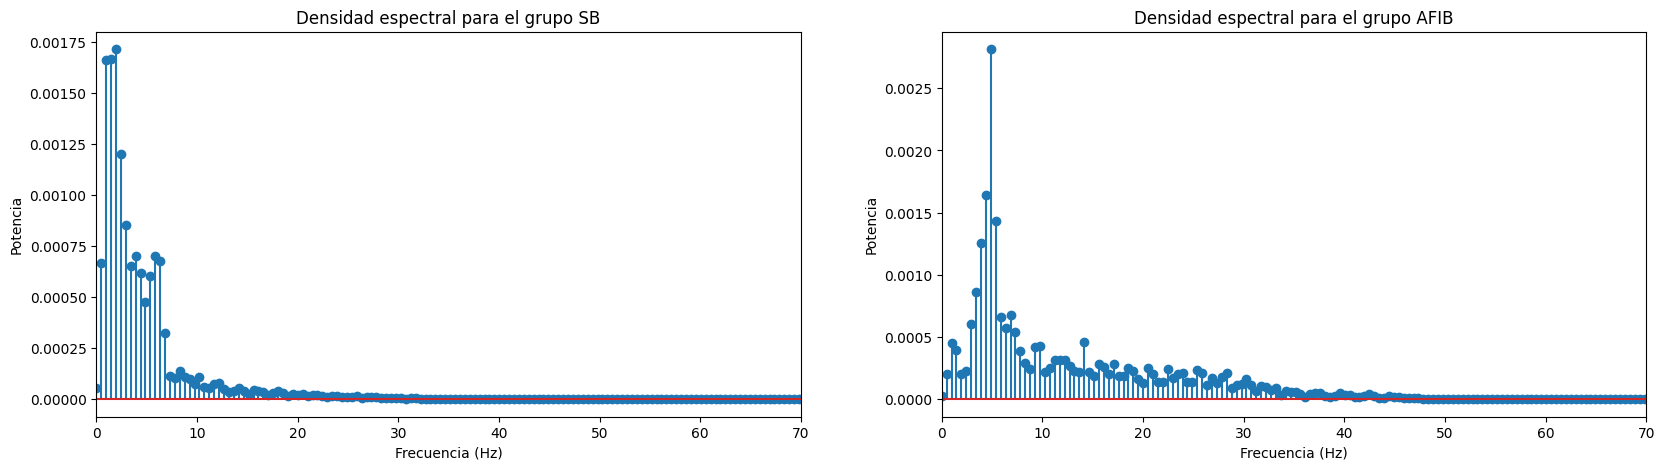

In [85]:
fs = 500
signal_data_AFIB = df_AFIB.iloc[10]['Filter']
signal_data_SB = df_SB.iloc[8]['Filter']
nperseg = 1024 # Ancho de la ventana, nperseg no debe ser mayor que la longitud de la señal
noverlap = int(nperseg / 2)  # Solapamiento de las ventanas del 50%
ventana = np.hamming(nperseg)  # Ventana Hamming
# Calcular el periodograma de Welch
f_AFIB, power_AFIB, frec_max_AFIB = espectro_potencia_welch(signal_data_AFIB, fs, window=ventana, nperseg=nperseg, noverlap=noverlap)
f_SB, power_SB, frec_max_SB = espectro_potencia_welch(signal_data_SB, fs, window=ventana, nperseg=nperseg, noverlap=noverlap)

# Se grafica frecuencia vs potencia
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.stem(f_SB, power_SB)
plt.ylabel('Potencia')
plt.xlabel('Frecuencia (Hz)')
plt.xlim(0, 70)
plt.title("Densidad espectral para el grupo SB")

plt.subplot(1,2,2)
plt.stem(f_AFIB, power_AFIB)
plt.ylabel('Potencia')
plt.xlabel('Frecuencia (Hz)')
plt.xlim(0, 70)
plt.title("Densidad espectral para el grupo AFIB")

print(f"Frecuencia de máxima potencia para el archivo SB: {frec_max_SB}")
print(f"Frecuencia de máxima potencia para el archivo AFIB: {frec_max_AFIB}")

### **Figura 1. Espectro de potencia de las señales de ECG para SB y AFIB.**

###**Aplicando a cada grupo la función mencionada anteriormente para obtener la frecuencia de máxima potencia de cada señal**

In [86]:
fs = 500
nperseg = 1024
noverlap = int(nperseg / 2)
ventana = np.hanning(nperseg)
list_max_frec_SB = []
for index, columna_SB in df_SB.iterrows():
    nombre_archivo_SB = columna_SB['Nombre Archivo']
    freqs, power, frec_maxima_potencia = espectro_potencia_welch(columna_SB['Filter'], fs, window=ventana, nperseg=nperseg, noverlap=noverlap)
    data = {"Nombre Registro": nombre_archivo_SB, "Estado": "SB", "fMP": frec_maxima_potencia}
    list_max_frec_SB.append(data)

df_SB_data = pd.DataFrame(list_max_frec_SB)

In [87]:
fs = 500
nperseg = 1024
noverlap = int(nperseg / 2)
ventana = np.hanning(nperseg)
list_max_frec_AFIB = []
for index, columna_AFIB in df_AFIB.iterrows():
    nombre_archivo = columna_AFIB['Nombre Archivo']
    freqs_AFIB, power_AFIB, frec_maxima_potencia_AFIB = espectro_potencia_welch(columna_AFIB['Filter'], fs, window=ventana, nperseg=nperseg, noverlap=noverlap)
    data = {"Nombre Registro": nombre_archivo, "Estado": "AFIB", "fMP": frec_maxima_potencia_AFIB}
    list_max_frec_AFIB.append(data)

df_AFIB_data = pd.DataFrame(list_max_frec_AFIB)

##**6. Dataframe**

### **Dataframe proyecto 2 (solo se tomó la columna fMP)**

In [88]:
data_ECG_Denoised = pd.read_csv('/content/drive/MyDrive/Bioseñales/data_ECG_Denoised.csv')

### **Dataframe del proyecto 3**

In [89]:
df_datos = pd.concat([df_SB_data,df_AFIB_data], ignore_index=True)
df_datos

,Nombre Registro,Estado,fMP
0,MUSE_20180116_172000_19000.csv,SB,3.906250
1,MUSE_20180116_172034_71000.csv,SB,2.929688
2,MUSE_20180116_172116_15000.csv,SB,3.906250
3,MUSE_20180116_172221_70000.csv,SB,0.488281
4,MUSE_20180116_172115_09000.csv,SB,0.976562
...,...,...,...
5664,MUSE_20180112_122300_52000.csv,AFIB,2.441406
5665,MUSE_20180112_122304_77000.csv,AFIB,0.976562
5666,MUSE_20180112_122555_71000.csv,AFIB,3.906250
5667,MUSE_20180112_122547_34000.csv,AFIB,4.394531


## **7. Análisis estadístico entre las señales del Proyecto 2 y las del presente proyecto**

## **Análisis Descriptivo**

In [90]:
# Del data frame creado anteriormente, se extraen solo los valores de fMP para cada grupo
df_SB_fMP_P3 = df_SB_data[df_SB_data["Estado"] == "SB"][["Estado", "fMP"]]
# Valores de fMP para el grupo con SB
SB_fMP_P3 = df_SB_fMP_P3['fMP'].values

df_AFIB_fMP_P3 = df_AFIB_data[df_AFIB_data["Estado"] == "AFIB"][["Estado", "fMP"]]
# Valores de fMP para el grupo con AFIB
AFIB_fMP_P3 = df_AFIB_fMP_P3['fMP'].values

# Del data frame creado para el proyecto 2
df_SB_fMP_P2 = data_ECG_Denoised[data_ECG_Denoised["Estado"] == "SB"][["Estado", "fMP"]]
# Valores de fMP para el grupo con SB
SB_fMP_P2 = df_SB_fMP_P2['fMP'].values

df_AFIB_fMP_P2 = data_ECG_Denoised[data_ECG_Denoised["Estado"] == "AFIB"][["Estado", "fMP"]]
# Valores de fMP para el grupo con AFIB
AFIB_fMP_P2 = df_AFIB_fMP_P2['fMP'].values

<ipython-input-91-435fed30d35c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_ECG_Denoised, x='Estado', y='fMP', palette="Set2", ax=axs[0])
<ipython-input-91-435fed30d35c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_datos, x='Estado', y='fMP',palette="Set2", ax=axs[1])


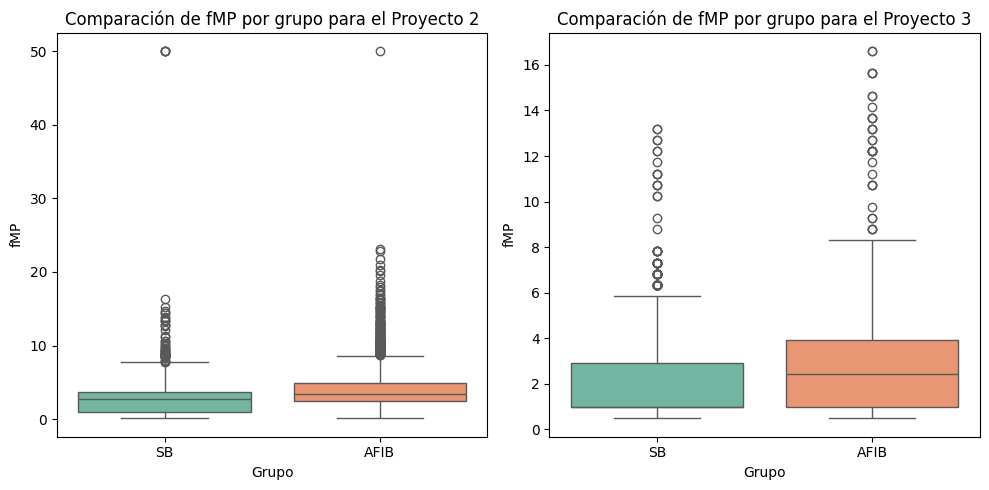

In [91]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(data=data_ECG_Denoised, x='Estado', y='fMP', palette="Set2", ax=axs[0])
axs[0].set_title('Comparación de fMP por grupo para el Proyecto 2')
axs[0].set_xlabel('Grupo')
axs[0].set_ylabel('fMP')
sns.boxplot(data=df_datos, x='Estado', y='fMP',palette="Set2", ax=axs[1])
axs[1].set_title('Comparación de fMP por grupo para el Proyecto 3')
axs[1].set_xlabel('Grupo')
axs[1].set_ylabel('fMP')
plt.tight_layout()
plt.show()

### **Figura 2. Diagrama de cajas y bigotes: comparación entre el fMP del proyecto 2 y el del proyecto 3.**

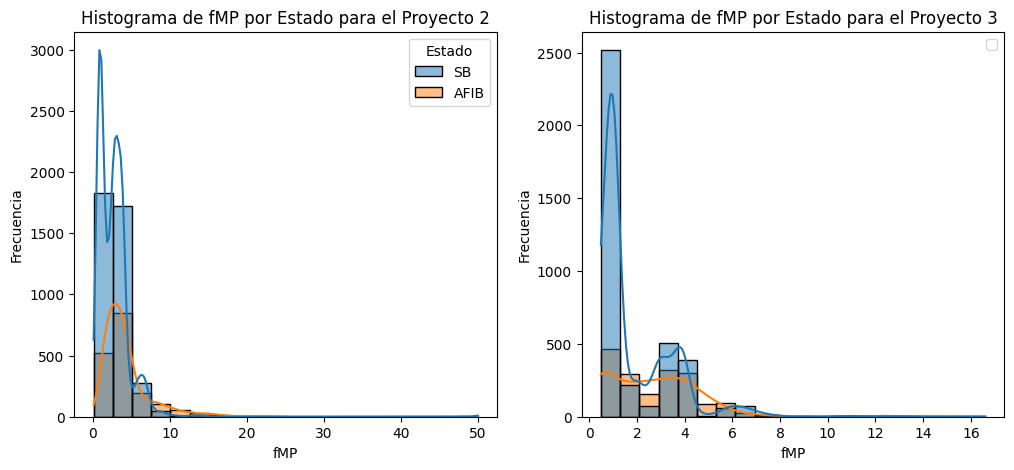

In [92]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data=data_ECG_Denoised, x='fMP', hue='Estado', bins=20, kde=True, legend=True,ax=axs[0])
axs[0].set_title('Histograma de fMP por Estado para el Proyecto 2')
axs[0].set_xlabel('fMP')
axs[0].set_ylabel('Frecuencia')
plt.legend()
sns.histplot(data=df_datos, x='fMP', hue='Estado', bins=20, kde=True, legend=True,ax=axs[1])
axs[1].set_title('Histograma de fMP por Estado para el Proyecto 3')
axs[1].set_xlabel('fMP')
axs[1].set_ylabel('Frecuencia')
plt.legend()
plt.show()

### **Figura 3. Histograma de fMP por estado para el proyecto 2 en comparación con el proyecto 3.**


## **Análisis inferencial**

Primero, es necesario realizar un análisis sobre qué tipo de prueba estadística utilizar (paramétrica o, no paramétrica). Para ello, sabemos que **los datos son robustos, dado que tenemos más de 5mil observaciones**

Ahora, como tenemos un tamaño de muestra robusta, podríamos utilizar una prueba paramétrica, dado que en estas pruebas, entre mayor número de observaciones, mayor exactitud. Sin embargo, como no concemos su distrubición ni homogenieidad, no podemos determinar esto, por lo tanto, analizaremos los supuestos (prueba de normalidad y prueba de homogeneidad)




### **Prueba de normalidad:**

Primero realizaremos un análisis de distribución de los datos y para ello, utilizaremos una prueba de bondad para conocer el tipo de distribución de la fMP para cada proyecto para así, determinar el tipo de prueba estadística a utilizar.

**Como el tamaño de muestra es robusto (tiene más de 90 datos), utilizaremos la prueba de Kolmogorov Smirnov (KS)**, utilizando las siguiente hipótesis:

- **Hipótesis nula (Ho):** los datos siguen una distribución normal

- **Hipótesis alternativa (Ha):** los datos no siguen una distribución normal

In [93]:
stat_normalidad_fMP_SB, p_valor_normalidad_fMP_SB = stats.kstest(SB_fMP_P3, 'norm')
print(f'P-valor para fMP para el grupo con SB es: {p_valor_normalidad_fMP_SB:.4f}')
alfa = 0.05  # Nivel de significancia
if p_valor_normalidad_fMP_SB > alfa:
    print('No se rechaza la hipótesis nula. Los datos el fMP del grupo con SB  del proyecto 3 para el siguen una distribución normal.')
else:
    print('Se rechaza la hipótesis nula. Los datos el fMP del grupo con SB del proyecto 3 no siguen una distribución normal.')

P-valor para fMP para el grupo con SB es: 0.0000
Se rechaza la hipótesis nula. Los datos el fMP del grupo con SB del proyecto 3 no siguen una distribución normal.


In [94]:
stat_normalidad_fMP_AFIB, p_valor_normalidad_fMP_AFIB = stats.kstest(AFIB_fMP_P3, 'norm')
print(f'P-valor para fMP para el grupo con AFIB es: {p_valor_normalidad_fMP_AFIB:.4f}')
alfa = 0.05  # Nivel de significancia
if p_valor_normalidad_fMP_AFIB > alfa:
    print('No se rechaza la hipótesis nula. Los datos el fMP del grupo con AFIB del proyecto 3 para el siguen una distribución normal.')
else:
    print('Se rechaza la hipótesis nula. Los datos el fMP del grupo con AFIB del proyecto 3 no siguen una distribución normal.')

P-valor para fMP para el grupo con AFIB es: 0.0000
Se rechaza la hipótesis nula. Los datos el fMP del grupo con AFIB del proyecto 3 no siguen una distribución normal.


In [95]:
stat_normalidad_fMP_SB_P2, p_valor_normalidad_fMP_SB_P2 = stats.kstest(SB_fMP_P2, 'norm')
print(f'P-valor para fMP para el grupo con SB es: {p_valor_normalidad_fMP_SB_P2:.4f}')
alfa = 0.05  # Nivel de significancia
if p_valor_normalidad_fMP_SB_P2 > alfa:
    print('No se rechaza la hipótesis nula. Los datos el fMP del grupo con SB  del proyecto 2 para el siguen una distribución normal.')
else:
    print('Se rechaza la hipótesis nula. Los datos el fMP del grupo con SB del proyecto 2 no siguen una distribución normal.')

P-valor para fMP para el grupo con SB es: 0.0000
Se rechaza la hipótesis nula. Los datos el fMP del grupo con SB del proyecto 2 no siguen una distribución normal.


In [96]:
stat_normalidad_fMP_AFIB_P2, p_valor_normalidad_fMP_AFIB_P2 = stats.kstest(AFIB_fMP_P2, 'norm')
print(f'P-valor para fMP para el grupo con AFIB es: {p_valor_normalidad_fMP_AFIB_P2:.4f}')
alfa = 0.05  # Nivel de significancia
if p_valor_normalidad_fMP_AFIB_P2 > alfa:
    print('No se rechaza la hipótesis nula. Los datos el fMP del grupo con AFIB del proyecto 2 para el siguen una distribución normal.')
else:
    print('Se rechaza la hipótesis nula. Los datos el fMP del grupo con AFIB del proyecto 2 no siguen una distribución normal.')

P-valor para fMP para el grupo con AFIB es: 0.0000
Se rechaza la hipótesis nula. Los datos el fMP del grupo con AFIB del proyecto 2 no siguen una distribución normal.


Según lo anterior, se puede determinar que, la fMP para cada proyecto no cuenta con una distribución normal para ninguno de los dos grupos evaluados. Por lo tanto, se determina que **no se cumple el supuesto de normalidad.**

### **Supuesto de Homocedasticidad**

Para verificar si si cumple o no este supuesto, se utilizó la prueba de levene, haciendo uso de los siguientes supuestos:

**Supuestos**:

- **Hipótesis Nula (H0)**:  los datos proceden de distribuciones con la misma varianza

- **Hipótesis Alternativa (Ha)**: los datos no proceden de distribuciones con la misma varianza

In [97]:
fMP_P3 = df_datos["fMP"]
fMP_P2 = data_ECG_Denoised["fMP"]
stat_homogeneidad_sFSB_fMP, p_valor_homogeniedad_sFSB_fMP = stats.levene(fMP_P3, fMP_P2, center='median')
print(f'P-valor: {p_valor_homogeniedad_sFSB_fMP:.4f}')
alfa = 0.05  # Nivel de significancia
if p_valor_homogeniedad_sFSB_fMP > alfa:
  print('No se rechaza la hipótesis nula. Los datos de fMP para los dos proyectos proceden de distribuciones con la misma varianza.')
else:
  print('Se rechaza la hipótesis nula. Los datos de fMP para los dos proyectos no proceden de distribuciones con la misma varianza.')

P-valor: 0.0000
Se rechaza la hipótesis nula. Los datos de fMP para los dos proyectos no proceden de distribuciones con la misma varianza.


Según lo evidenciado anteriormente, se puede determinar que existe heterocedasticidad entre los datos de fMP para los dos proyectos, **por lo que no se cumple este supuesto.**

### **Supuesto de Independencia de las variables**

Para verificar este supuesto, se realizó una matriz de correlación entre el fMP del proyecto 2 respecto a la misma característica espectral pero del Proyecto 3.

In [98]:
# Concatenando los dataframes de cada proyecto
df_p2_p3 = pd.merge(df_datos, data_ECG_Denoised[['Nombre Registro', 'fMP']], on='Nombre Registro', how='left', suffixes=('_proyecto3', '_proyecto2'))

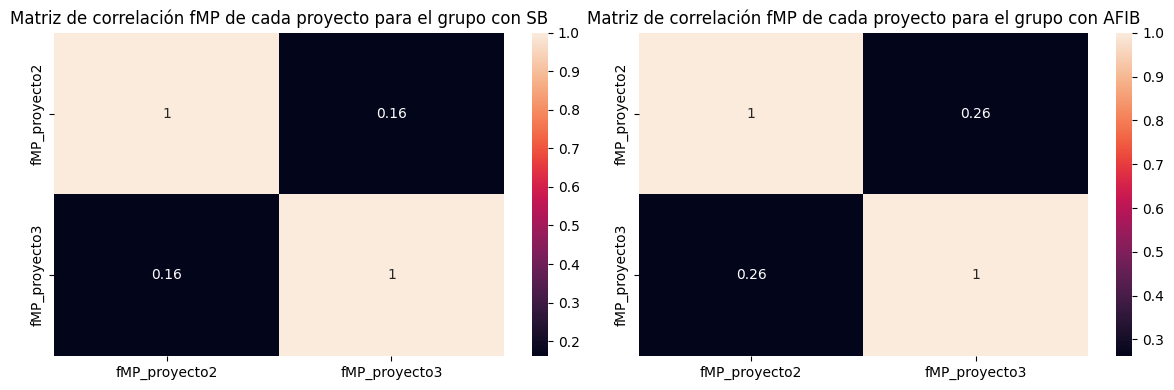

In [99]:
# Solo extreyendo las columnas numéricas del data frame para el grupo SB
df_SB_P3_P4 = df_p2_p3[df_p2_p3["Estado"] == "SB"][["fMP_proyecto2","fMP_proyecto3"]]
df_AFIB_P3_P4 = df_p2_p3[df_p2_p3["Estado"] == "AFIB"][["fMP_proyecto2","fMP_proyecto3"]]
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# Matriz de correlación para SB
sns.heatmap(df_SB_P3_P4.corr(), fmt='.2g', annot=True, ax=axes[0])
axes[0].set_title("Matriz de correlación fMP de cada proyecto para el grupo con SB")
# Matriz de correlación para AFIB
sns.heatmap(df_AFIB_P3_P4.corr(), fmt='.2g', annot=True, ax=axes[1])
axes[1].set_title("Matriz de correlación fMP de cada proyecto para el grupo con AFIB")
plt.tight_layout()
plt.show()

Según lo evidenciado en la matriz de coreelación de cada grupo, es posible determinar que para la característica espectral de fMP de cada proyecto, no se encuentran relacionadas, dado que se evidencian correlaciones cercanas a cero, lo que indica que se  **se cumple el supuesto de independencia de las observaciones para cada grupo en los dos proyectos.**

### **Prueba no paramétrica:**

Se determina que debido a que no se cumplen los supuestos de normalidad y de homocedasticidad determinados anteriormente, **se concluye la necesidad de utilizar una prueba no paramétrica para el análisis inferencial entre los datos de los dos proyectos.**

Debio a que con la prueba de **Mann - Whitney**, es posible comparar las medias de dos grupos, **se comparará las diferencias significativas la característica espectral de fMP para los dos grupos en cada proyecto.**

Sin embargo, revisaremos inicialmente si los valores de la fMP para los dos grupos de este proyecto si cuentan con diferencias significativas, lo cual determina el poder de la fMP para actuar como una metrica diferenciadora entre dos grupos.

In [100]:
stat_no_parametrica_SB_AFIB, p_valor_no_parametrica_SB_AFIB = stats.mannwhitneyu(SB_fMP_P3, AFIB_fMP_P3, alternative='two-sided')
alfa = 0.05  # Nivel de significancia
if p_valor_no_parametrica_SB_AFIB < alfa:
    print(f'p-value = {p_valor_no_parametrica_SB_AFIB} Se rechaza la hipótesis nula. \n Hay evidencia de diferencia entre el fMP para cada grupo del proyecto 3')
else:
    print(f'p-value = {p_valor_no_parametrica_SB_AFIB} No hay suficiente evidencia para rechazar la hipótesis nula. \n No se encontró diferencia significativa entre el fMP para cada grupo del proyecto 3')

p-value = 1.2399795305017349e-74 Se rechaza la hipótesis nula. 
 Hay evidencia de diferencia entre el fMP para cada grupo del proyecto 3


Según lo anterior, se puede determinar que la fMP para las señales filtrados de este proyecto puede actuar como un factor diferenciador entre los dos grupos evaluados (SB y AFIB)

In [101]:
stat_no_parametrica_SB, p_valor_no_parametrica_SB = stats.mannwhitneyu(SB_fMP_P3, SB_fMP_P2, alternative='two-sided')
alfa = 0.05  # Nivel de significancia
if p_valor_no_parametrica_SB < alfa:
    print(f'p-value = {p_valor_no_parametrica_SB} Se rechaza la hipótesis nula. \n Hay evidencia de diferencia entre el fMP para el grupo SB en los dos proyectos')
else:
    print(f'p-value = {p_valor_no_parametrica_SB} No hay suficiente evidencia para rechazar la hipótesis nula. \n No se encontró diferencia significativa entre fMP para el grupo SB en los dos proyectos')

p-value = 2.601727991320761e-85 Se rechaza la hipótesis nula. 
 Hay evidencia de diferencia entre el fMP para el grupo SB en los dos proyectos


In [102]:
stat_no_parametrica_fMP, p_valor_no_parametrica_fMP = stats.mannwhitneyu(AFIB_fMP_P3, AFIB_fMP_P2, alternative='two-sided')
alfa = 0.05  # Nivel de significancia
if p_valor_no_parametrica_fMP < alfa:
    print(f'p-value = {p_valor_no_parametrica_fMP} Se rechaza la hipótesis nula. \n Hay evidencia de diferencia entre el fMP para el grupo AFIB en los dos proyectos')
else:
    print(f'p-value = {p_valor_no_parametrica_fMP} No hay suficiente evidencia para rechazar la hipótesis nula. \n No se encontró diferencia significativa entre fMP para el grupo AFIB en los dos proyectos')

p-value = 3.2984288826119797e-56 Se rechaza la hipótesis nula. 
 Hay evidencia de diferencia entre el fMP para el grupo AFIB en los dos proyectos


Según lo anterior, se puede determinar que el proceso de filtrado utilizado en el presente proyecto fué diferente al utilizado para filtrar las señales del proyecto 2, dado que existe una diferencia significativa entre los dos grupos. Así mismo, se puede determinar que la característica espectral del fMP difiere entre los dos proyectos por lo que se determina que está asociada al proceso de filtrado.

## **Comparación gráfica de una señal de cada grupo de cada proyecto.**

Para esto, se graficó una señal de cada grupo en cada proyecto con el fin de identificar gráficamente diferencias entre el flujo de trabajo utilizado en el presente proyecto y el flujo de trabajo del proyecto 2 después de normalizar las señales.

In [103]:
# Señales del proyecto 2
names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
ruta_carpeta_P2 = '/content/drive/MyDrive/Bioseñales/ECGDataDenoised'
archivo_SB_P2 = "MUSE_20180111_160033_11000.csv" # Archivo en la lista SB
ruta_SB = os.path.join(ruta_carpeta_P2, archivo_SB_P2)
try:
    data_frame = pd.read_csv(ruta_SB, delimiter=',', names=names)
    signal_SB = data_frame["II"].values
    signal_detrending_SB_1 = signal.detrend(signal_SB)
    signal_compression_SB = compression(signal_detrending_SB_1)
    signal_detrending_SB_2 = signal.detrend(signal_compression_SB)
except FileNotFoundError:
    print(f'El archivo {archivo_SB_P2} no se encontró en {ruta_carpeta_P2}.')

archivo_AFIB_P2 = "MUSE_20180114_121533_70000.csv"
ruta_AFIB = os.path.join(ruta_carpeta_P2, archivo_AFIB_P2)
try:
    data_AFIB = pd.read_csv(ruta_AFIB, delimiter=',', names=names)
    signal_AFIB = data_AFIB["II"].values
    signal_detrending_AFIB_1 = signal.detrend(signal_AFIB)
    signal_compression_AFIB = compression(signal_detrending_AFIB_1)
    signal_detrending_AFIB_2 = signal.detrend(signal_compression_AFIB)
except FileNotFoundError:
    print(f'El archivo {archivo_AFIB_P2} no se encontró en {ruta_carpeta_P2}.')

# Mismas señales pero del proyecto 3
SB_Filter = df_SB.loc[df_SB['Nombre Archivo'] == "MUSE_20180111_160033_11000.csv"]
Signal_SB_P3 = SB_Filter['Filter'].values
AFIB_Filter = df_AFIB.loc[df_AFIB['Nombre Archivo'] == "MUSE_20180114_121533_70000.csv"]
Signal_AFIB_P3 = AFIB_Filter['Filter'].values

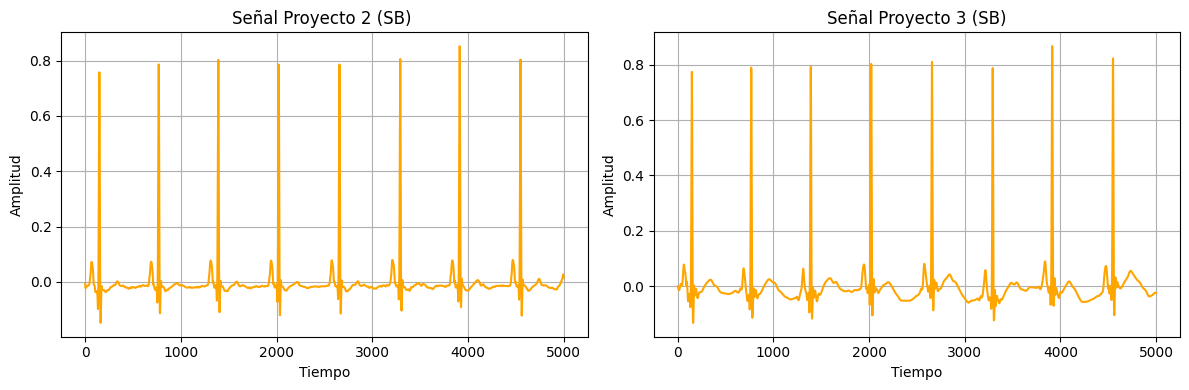

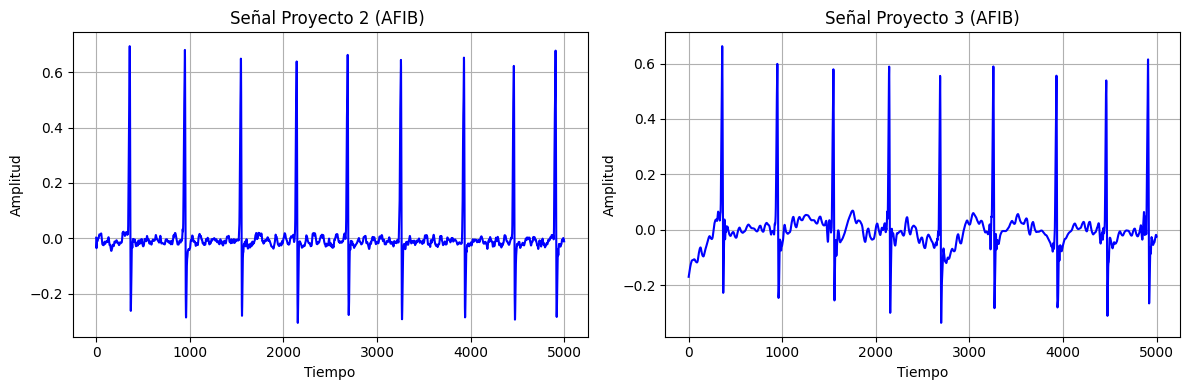

In [104]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(signal_detrending_SB_2, color = "orange")
axs[0].set_title('Señal Proyecto 2 (SB) ')
axs[0].set_xlabel('Tiempo')
axs[0].set_ylabel('Amplitud')
axs[0].grid(True)
Signal_SB_P3_data = np.concatenate(Signal_SB_P3).ravel()
axs[1].plot(Signal_SB_P3_data, color = 'orange')
axs[1].set_title('Señal Proyecto 3 (SB)')
axs[1].set_xlabel('Tiempo')
axs[1].set_ylabel('Amplitud')
axs[1].grid(True)
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(signal_detrending_AFIB_2, color = "blue")
axs[0].set_title('Señal Proyecto 2 (AFIB) ')
axs[0].set_xlabel('Tiempo')
axs[0].set_ylabel('Amplitud')
axs[0].grid(True)
Signal_AFIB_P3_data = np.concatenate(Signal_AFIB_P3).ravel()
axs[1].plot(Signal_AFIB_P3_data, color = 'blue')
axs[1].set_title('Señal Proyecto 3 (AFIB)')
axs[1].set_xlabel('Tiempo')
axs[1].set_ylabel('Amplitud')
axs[1].grid(True)
plt.tight_layout()
plt.show()

###**Figuras 4 y 5. Identificación de diferencias entre una señal de cada grupo para los 2 proyectos**

A continuación, en el informe, se explicará lo visto en estos dos gráficos.

#**Informe de los resultados obtenidos**

###**Elección del flujo de procesamiento 2**


Como se indicó en sección 4, el flujo de procesamiento elegido fué el 2, dado que permitió eliminar gran parte del ruido presente en las señales originales, conservando características propias de la señal y evitando generar tendencias en la misma. Sin embargo, se evidenció en alguna de las 20 señales graficadas (10 para cada grupo), que existen señales que originalmente tienen mucho ruido (visto gráficamente) pero también existen otras señales que no tienen mucho ruido, por lo que es preocupante el hecho de haber realizado un sobrefiltrado de algunas de las señales. Así mismo, existen señales que de forma propia tienen ciertas tendencias que aumentaban al aplicar los flujos de procesamiento 1 y 3, por lo que se decidió no utilizarlos.

### **Espectro de potencia de las señales de ECG para SB y AFIB del proyecto 3 (Figura 1 solo para una señal de cada grupo)**


En primera instancia, la frecuencia de máxima potencia presenta valores distintivos para cada condición: el grupo SB exhibe una frecuencia máxima de aproximadamente 1.46 Hz, mientras que el grupo AFIB muestra un valor considerablemente más elevado, alcanzando los 4.88 Hz. Esta diferencia de 3.42 Hz en la frecuencia de repetición del patrón dominante resulta significativa para la caracterización de ambas condiciones.

En el caso del grupo SB, se observan picos de potencia significativos concentrados en las frecuencias bajas, concordante con la naturaleza regular y pausada de este ritmo cardíaco [5]. En contraste, el grupo AFIB, aunque también presenta pico en frecuencias bajas, se caracteriza por una distribución de potencia más amplia a través de múltiples frecuencias, reflejando la variabilidad inherente a esta condición arrítmica.

Las diferencias observadas se fundamentan en la naturaleza específica de cada condición cardíaca. La bradicardia sinusal, al ser un ritmo lento y regular, genera una concentración de energía en frecuencias bajas, similar a una señal periódica bien definida. Por otro lado, la fibrilación auricular, caracterizada por latidos cardíacos rápidos e irregulares [6], produce una dispersión de energía a lo largo de un espectro más amplio de frecuencias, lo que se evidencia en el periodograma de la Figura 1. como múltiples picos de menor amplitud.


### **Diagrama de cajas y bigotes de comparación entre fMP del proyecto 2 y el del proyecto 3 (Figura 2)**

Para el 1er protocolo en el que se utilizaron los datos del proyecto 2, tras un proceso de filtrado de detrend-compresión-detrend. Para este método se generan distribuciones de fMP con características distintivas en ambos grupos de estudio. En el grupo SB, la mediana de la fMP se sitúa aproximadamente en 2 Hz, con un rango intercuartílico entre 1 y 4 Hz. En el grupo AFIB, en cambio, se observa una mediana cercana a 3 Hz, pero con una mayor dispersión de los datos y la presencia de valores atípicos que alcanzan hasta los 50 Hz en ambos grupos. Estos valores atípicos son más prominentes en el grupo AFIB, lo cual sugiere que este método de filtrado podría ser más sensible a la presencia de artefactos en las señales de ECG, como movimientos del paciente, interferencias eléctricas, ruido muscular o componentes de alta frecuencia, afectando la precisión en el análisis de señales de ECG, al no lograr filtrar adecuadamente estos artefactos, dejando remanentes de alta frecuencia reflejados como valores atípicos[1].

En el 2do protocolo en el que se utilizaron los datos del proyecto 3, se implementa un proceso de filtrado basado en una secuencia de detrend, un filtro wavelet Symlet y un filtro FIR pasa bajas a 50 Hz. Este método muestra distribuciones de fMP notablemente diferentes. En el grupo SB, la mediana de la fMP se encuentra cerca de 1 Hz, con un rango intercuartílico más estrecho entre 1 y 3 Hz. En el grupo AFIB, la mediana se ubica alrededor de 2.5 Hz, con un rango intercuartílico de 1 a 4 Hz. Este proyecto presenta valores atípicos menos concentrados y más dispersos en ambas poblaciones, lo que indica un mejor control de los artefactos y una mayor robustez en la eliminación de componentes no deseados, especialmente en altas frecuencias. Causado principalmente por, una descomposición más refinada de la señal, separando eficazmente los componentes de alta frecuencia y eliminando de manera más efectiva los componentes de alta frecuencia restantes [1].

Al comparar ambos métodos, se observan algunas diferencias significativas. En términos de eficiencia para reducir el ruido, el protocolo del Proyecto 3 demuestra una mayor efectividad en el control de valores extremos, lo cual se refleja en la menor cantidad y magnitud de valores atípicos en las distribuciones de fMP. La combinación del filtro wavelet Symlet con el filtro FIR pasa bajas proporciona una mejor discriminación entre señales fisiológicas y artefactos de alta frecuencia. Aunque ambos métodos permiten distinguir entre SB y AFIB, el protocolo del proyecto 3 ofrece una separación más clara entre las distribuciones de ambos grupos, facilitando la identificación y clasificación de estas condiciones cardíacas, lo que mejora su capacidad diagnóstica.

En cuanto a la estabilidad en el procesamiento, el protocolo del proyecto 2 muestra una mayor variabilidad en las frecuencias altas, lo cual puede comprometer la estabilidad del procesamiento de señales en este rango. En cambio, el proyecto 3 presenta distribuciones más compactas y controladas, lo que sugiere una mayor robustez en su procesamiento. Además, el rango amplio de valores de fMP (0 - 50 Hz), incluyendo frecuencias elevadas poco representativas de la actividad cardíaca. En contraste, el proyecto 3 ofrece un rango de frecuencias más acotado (0- 16 Hz), que es consistente con los rangos fisiológicos esperados en las señales cardíacas tras eliminar el ruido producido por la red eléctrica [4].



### **Histograma de fMP por estado para el proyecto 2 en comparación con el proyecto 3. (Figura 3)**

En el caso del Proyecto 2, el histograma muestra una marcada diferencia entre los patrones de fMP para SB y AFIB. Para el grupo SB, la distribución se concentra alrededor de los 2 Hz, con una mediana relativamente compacta. Sin embargo, el grupo AFIB exhibe una distribución mucho más amplia y dispersa, con una mediana cercana a los 3 Hz, pero con valores atípicos que llegan hasta los 50 Hz. Esta notable diferencia en la dispersión sugiere que el protocolo de filtrado utilizado en el Proyecto 2 podría ser más sensible a la presencia de artefactos o componentes de alta frecuencia en las señales de AFIB, generando una mayor variabilidad en los resultados.

En contraste, el histograma del Proyecto 3 muestra patrones de fMP más diferenciados y controlados entre los grupos SB y AFIB. Para el grupo SB, la mediana se sitúa aproximadamente en 1 Hz, con un rango intercuartílico más estrecho, entre 0.5-3 Hz. En el caso del grupo AFIB, la mediana se ubica alrededor de 2.5 Hz, con un rango intercuartílico más amplio, entre 1-4 Hz. Cabe destacar que la distribución general presenta una menor cantidad de valores atípicos extremos, lo que sugiere un mejor control de artefactos y ruido de alta frecuencia en comparación con el Proyecto 2.

Los resultados del Proyecto 3 demuestran una mayor capacidad para diferenciar entre SB y AFIB en términos de la fMP. La separación más clara entre las distribuciones de ambos grupos sugiere que este protocolo de filtrado avanzado permite una caracterización más precisa y confiable de las diferencias fisiológicas entre estas dos condiciones cardíacas.

En contraste, el Proyecto 2 presenta una mayor superposición entre los patrones de fMP de SB y AFIB, lo que dificultaría la discriminación entre estas condiciones a partir del análisis espectral. La mayor variabilidad y presencia de valores atípicos en el grupo AFIB indican que el filtrado secuencial de detrend, compresión y detrend podría no ser tan efectivo en el manejo de artefactos y componentes de alta frecuencia.


### **Análisis Inferencial (Prueba no paramétrica)**

Del análisis inferencial realizado, inicialmente se determinó que existe una correlación baja entre las señales del proyecto 2 y las señales del proyecto 3 respecto a la característica espectral de la fMP. Según lo anterior, puede concluirse que las señales de cada proyecto son muy diferentes entre sí, lo que determina que el flujo de procesamiento 2 elegido no tiene con el mismo rendimiento que el flujo de procesamiento utilizado para filtrar las señales del proyecto 2 (el cual es desconocido).

Respecto a la prueba no paramétrica utilizada, al realizar inicialmente el análisis entre los valores de fMP de cada grupo únicamente para el proyecto 3, se reitera la capacidad de esta característica espectral de actuar como un factor diferencial entre dos grupos de enfermedades. Así mismo, al aplicar la prueba paramétrica para el fMP de cada grupo en cada proyecto, también se determinó que existía diferencias significativas lo que también determina que el proceso de filtrado no fué el mismo en los dos proyectos y las señales entre sí son muy diferentes.



### **Identificación de diferencias (a nivel gráfico) entre una señal de cada grupo para los 2 proyectos (Figuras 4 y 5)**

Según lo evidenciado en la Figura 4 (señales filtradas de cada proyecto para el grupo con SB) se evidencia notables diferencias a nivel gráfico entre las dos señales que pertenencen a un mismo sujeto.

Gráficamente se evidenció que existen picos en la señal que se evidencian mejor (o son más notables) en la señal del proyecto 3 y que esos mismo picos se ven un poco menos notables para la señal del proyecto 2. Lo anterior, puede deberse a que, como se comentó, el flujo de trabajo utilizado para filtrar las señales del proyecto 2 no se conocen y es posible que, se utilizara un procesamiento más riguroso.

Por otro lado, las señales para el grupo con AFIB (Figura 5) muestran aún más características que diferencian a las señales de cada proyecto. Inicialmente se evidencia lo mismo que se mencionó anteriormente para el grupo con SB solo que en mayor medida, dado que las señales intermedias a cada pico tienen una mayor amplitud en la señal del proyecto 3 respecto a las señales del proyecto 2. También, para este grupo se evidencia una cierta tendencia para la señal del proyecto 3 que no se evidencia en la señal del proyecto 2, lo cual es importante dado que si bien las señales del proyecto 3 tienen un detrend, como se vió en el proyecto 2, el mismo se encarga de realizar una eliminación de tendencias lineales, lo cual determina la necesidad de aplicar técnicas de eliminación de tendencias no lineales.

#**Conclusiones:**

- Inicialmente, se puede concluir que en este proyecto se sigue demostrando la capacidad de la fMP de discriminar entre dos grupos, según lo evidenciado en la sección del análisis inferencial realizado a las señales del proyecto 3.

- Podemos concluir que las señales del Proyecto 2 y las del Proyecto 3 son muy diferentes entre sí dado que se evideció a nivel gráfico con una sola señal de cada proyecto y de cada grupo, diferencias respecto a la amplitud de algunos picos característicos de la señal y la presencia de tendencias en las señales del Proyecto 3.

- Se concluye que el flujo de procesamiento 2 conservó las características propias de las señales originales eliminando el ruido, a través de un análisis realizado a 10 sujetos de cada grupo (el análisis realizado fué gráfico).

- Se concluye la importancia de aplicar un filtro Wavelet, dado que como se evidenció en la mayoría de las 10 señales graficadas para cada grupo, el flujo de procesamiento 2 (en el cual solo se utilizó un filtro pasa bandas) se encontró una señal con presencia de ruido (medido a nivel gráfico) lo que determina la necesidad de aplicar un filtro wavelet para eliminar señales de menor amplitud de señales de mayor amplitud.


# **Recomendaciones respecto al proceso de filtrado:**
- El análisis gráfico realizado para determinar el mejor flujo de trabjo no es el mejor método para tomar este tipo de decisiones. Por lo tanto, se recomienda aplicar diferentes métricas como el error cuadrático medio, dado que permiten evidenciar cuantitativamente la efectividad de procesos de filtrado. Esta métrica se utilizó en muchos de los artículos revisados para determinar el la familia de wavelet a utilizar.
- Así mismo, se recomienda utilizar otros filtros más rigursos para el procesamiento digital de imágenes  y métodos de eliminación de tendencias no lineales (según lo evidenciado en las Figuras 4 y 5).


##**Referencias**

**[1]** Sangaiah AK, Arumugam M, Bian GB. An intelligent learning approach for improving ECG signal classification and arrhythmia analysis. Artif Intell Med. 2020 Mar;103:101788. doi: 10.1016/j.artmed.2019.101788. Epub 2019 Dec 31. PMID: 32143795.

**[2]** H. Amhia and A. K. Wadhwani, “Stability and phase response analysis of optimum Reduced-Order IIR filter designs for ECG R-Peak Detection,” Journal of Healthcare Engineering, vol. 2022, pp. 1–14, Apr. 2022, doi: 10.1155/2022/9899899.

**[3]** K. S. Kumar, B. Yazdanpanah and P. R. Kumar, "Removal of noise from electrocardiogram using digital FIR and IIR filters with various methods," 2015 International Conference on Communications and Signal Processing (ICCSP), Melmaruvathur, India, 2015, pp. 0157-0162, doi: 10.1109/ICCSP.2015.7322780.

**[4]** M. CB, “PROCESSING ECG SIGNAL WITH KAISER WINDOW- BASED FIR DIGITAL FILTERS,” International Journal of Engineering Science and Technology (IJEST), Jan. 2011, [Online]. Available: https://www.idc-online.com/technical_references/pdfs/electrical_engineering/PROCESSING.pdf

**[5]** «Bradicardia - Síntomas y causas - Mayo Clinic». https://www.mayoclinic.org/es/diseases-conditions/bradycardia/symptoms-causes/syc-20355474

**[6]** «Fibrilación auricular - Síntomas y causas - Mayo Clinic». https://www.mayoclinic.org/es/diseases-conditions/atrial-fibrillation/symptoms-causes/syc-20350624

**[7]** T. Singh, P. Agarwal and V. K. Pandey, "ECG baseline noise removal techniques using window based FIR filters," 2014 International Conference on Medical Imaging, m-Health and Emerging Communication Systems (MedCom), Greater Noida, India, 2014, pp. 131-136, doi: 10.1109/MedCom.2014.7005990.

**[8]** M. Bojarnejad, J. Blake, J. P. Bourke, A. Murray and P. Langley, "Comparing power spectral density of the 64-channel surface ECG with left atrial electrograms in patients in atrial fibrillation," 2012 Computing in Cardiology.

